# Iteration 1
# Phishing Link Detection Machine Learning

Jonathan Christyadi (502705) - AI Core 02


This notebook aims at predicting the likelihood of a link being a phishing link or a legitimate link with a focus on exploring and testing hypotheses that necessitate further research.


Dataset: https://data.mendeley.com/datasets/c2gw7fy2j4/3

## Introduction

With the rapid expansion of digital technologies, our lives have become more
interconnected and convenient. However, this digital revolution also brings along its fair
share of risks, particularly in the form of cyber threats. Among these threats, phishing attacks
have emerged as a prevalent and deceptive form of cybercrime. Phishing relies on tricking
individuals into divulging sensitive information, such as passwords or financial details,
through deceptive emails or websites.


In response to the escalating threat posed by phishing attacks, there is a pressing
need for effective cybersecurity solutions. This project proposes the development of an
AI-powered phishing link detection system. By leveraging advanced machine learning and
natural language processing techniques, the goal is to enhance our ability to detect and
mitigate phishing attacks. Ultimately, the aim is to empower users and organizations with
proactive defenses against phishing attempts, thereby safeguarding digital security and
privacy.

## Domain Understanding 

- What is a phishing link?


A phishing link is a deceptive URL designed to deceive individuals into disclosing sensitive information through fraudulent means, typically distributed via emails or websites mimicking legitimate sources. These links exploit human vulnerabilities by exhibiting irregularities in domain names, variations of popular domains, or the presence of non-standard characters. Detecting phishing links requires advanced technologies like artificial intelligence, particularly machine learning and natural language processing, to analyze online behavior and content patterns for early detection. Effective phishing link detection systems rely on comprehensive feature engineering and innovative algorithms to differentiate between legitimate and fraudulent URLs, thereby safeguarding digital security and privacy against evolving cyber threats.

## Analytic Approach
The following hypotheses guide the analytic approach, with conclusions subject to empirical validation:

- Target Variable:
The target variable is the link label, distinguishing between phishing links and legitimate
links. This binary classification problem serves as the foundation for model development and
evaluation.

- Algorithm Type:
Utilize the sigmoid algorithm, given the binary nature of the problem (phishing link or
legitimate link). The sigmoid algorithm is well-suited for binary classification tasks, offering
flexibility and interpretability in model outputs.

- Predicted Features:
URL length, hostname length, special characters, punnycodes

# Importing Libraries

In [169]:
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# 📦 Data provisioning

After loading the dataset, I found out some inconsistencies among the data. First the label of the link (phishing or legitimate) can be changed into binary format. Also, for domain_with_copyright column, some are in binary and some are written in alphabets, for example: zero, One, etc.

In [170]:
df = pd.read_csv("Data\dataset_link_phishing.csv", sep=',', index_col=False, dtype='unicode')
df.sample(5)

id                                                url url_length  \
10845  2844  https://www.parfumuri-timisoara.ro/?SID=f79h0t...         66   
4875   4875                         https://www.bestcamper.de/         26   
3471   3471  https://financiallifecoaching.builderallwp.com...        125   
10540  2539                       http://vkinndex.webservis.ru         28   
14369  6368                                https://u.to/NgUvGA         19   

      hostname_length ip total_of. total_of- total_of@ total_of? total_of&  \
10845              26  1         2         1         0         1         0   
4875               17  0         2         0         0         0         0   
3471               38  0         2         1         0         1         0   
10540              21  1         2         0         0         0         0   
14369               4  1         1         0         0         0         0   

      total_of= total_of_ total_of~ total_of% total_of/ total_of* total_of:  \
10845         1         0         0         0         3         0         1   
4875          0         0         0         0         3         0         1   
3471          0         0         0         0         6         0         1   
10540         0         0         0         0         2         0         1   
14369         0         0         0         0         3         0         1   

      total_of, total_of; total_of$ total_of_www total_of_com  \
10845         0         0         0            1            0   
4875          0         0         0            1            0   
3471          0         0         0            0            0   
10540         0         0         0            0            0   
14369         0         0         0            0            0   

      total_of_http_in_path https_token ratio_digits_url ratio_digits_host  \
10845                     0           0      0.106060606                 0   
4875                      0           0                0                 0   
3471                      0           0                0                 0   
10540                     0           1                0                 0   
14369                     0           0                0                 0   

      punycode port tld_in_path tld_in_subdomain abnormal_subdomain  \
10845        0    0           0                0                  0   
4875         0    0           0                0                  0   
3471         0    0           0                0                  0   
10540        0    0           0                0                  0   
14369        0    0           0                0                  0   

      nb_subdomains prefix_suffix random_domain shortening_service  \
10845             2             1             0                  0   
4875              2             0             0                  0   
3471              2             1             0                  0   
10540             2             0             0                  0   
14369             1             0             0                  1   

      path_extension nb_redirection nb_external_redirection length_words_raw  \
10845              0              0                       0                5   
4875               0              0                       0                2   
3471               0              0                       0                7   
10540              0              0                       0                2   
14369              0              0                       0                2   

      char_repeat shortest_words_raw shortest_word_host shortest_word_path  \
10845           3                  3                  3                  3   
4875            3                  3                  3                  0   
3471            6                  2                 12                  2   
10540           1                  8                  8                  0   
14369           0      

Taking a look at the data types of the columns and plan a "strategy" what would I do with the data. If there are nulls in the data, I need to clean the data. Also, since the type is object, I might need to adjust it.


In [171]:
# Taking a look at the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          19431 non-null  object
 1   url                         19431 non-null  object
 2   url_length                  19431 non-null  object
 3   hostname_length             19431 non-null  object
 4   ip                          19431 non-null  object
 5   total_of.                   19431 non-null  object
 6   total_of-                   19431 non-null  object
 7   total_of@                   19431 non-null  object
 8   total_of?                   19431 non-null  object
 9   total_of&                   19431 non-null  object
 10  total_of=                   19431 non-null  object
 11  total_of_                   19431 non-null  object
 12  total_of~                   19431 non-null  object
 13  total_of%                   19431 non-null  ob

In [172]:
# Sampling the dataset
df.sample(2)

id                                                url url_length  \
15182  7181  https://www.drugs.com/answers/does-buspar-caus...         91   
13384  5383  https://www.allinterview.com/viewpost/163290/i...         83   

      hostname_length ip total_of. total_of- total_of@ total_of? total_of&  \
15182              13  1         3         7         0         0         0   
13384              20  1         3         4         0         0         0   

      total_of= total_of_ total_of~ total_of% total_of/ total_of* total_of:  \
15182         0         0         0         0         4         0         1   
13384         0         0         0         0         5         0         1   

      total_of, total_of; total_of$ total_of_www total_of_com  \
15182         0         0         0            1            0   
13384         0         0         0            1            0   

      total_of_http_in_path https_token ratio_digits_url ratio_digits_host  \
15182                     0           0      0.065934066                 0   
13384                     0           0      0.072289157                 0   

      punycode port tld_in_path tld_in_subdomain abnormal_subdomain  \
15182        0    0           0                0                  0   
13384        0    0           0                0                  0   

      nb_subdomains prefix_suffix random_domain shortening_service  \
15182             3             0             0                  0   
13384             3             0             0                  0   

      path_extension nb_redirection nb_external_redirection length_words_raw  \
15182              0              0                       0               12   
13384              0              0                       0               10   

      char_repeat shortest_words_raw shortest_word_host shortest_word_path  \
15182           5                  3                  3                  4   
13384           4                  2                  3                  2   

      longest_words_raw longest_word_host longest_word_path avg_words_raw  \
15182                10                 5                10   5.666666667   
13384                12                12                 8           6.2   

      avg_word_host avg_word_path phish_hints domain_in_brand  \
15182             4             6           0               0   
13384           7.5         5.875           3               0   

      brand_in_subdomain brand_in_path suspecious_tld statistical_report  \
15182                  0             0              0                  0   
13384                  0             0              0                  0   

      nb_hyperlinks ratio_intHyperlinks ratio_extHyperlinks  \
15182           176         0.994318182         0.005681818   
13384            65         0.923076923         0.076923077   

      ratio_nullHyperlinks nb_extCSS ratio_intRedirection  \
15182                    0         0                    0   
13384                    0         0                    0   

      ratio_extRedirection ratio_intErrors ratio_extErrors login_form  \
15182                    2               0               0          0   
13384                    0               0               0          0   

      external_favicon links_in_tags submit_email ratio_intMedia  \
15182                0           100            0    85.71428571   
13384                0            80            0            100   

      ratio_extMedia sfh iframe popup_window safe_anchor onmouseover  \
15182    14.28571429   0      0            0         100           0   
13384              0   0      0            0           0           0   

      right_clic empty_title domain_in_title domain_with_copyright  \
15182          0           0               1                     1   
13384          0           0               1                     0   

      whois_registered_domain domain_registration_length domain_age  \
15182            

# Preprocessing

## 🆔 Encoding
After understanding the data on the sample, I found that some data are not in a good form and there is a room for improvement, such as the `domain_with_copyright` and `status` columns.

## Mapping values into binary

After taking a closer look into the data samples, it can be observed that there are some inconsistencies and room for improvement on the data values.

In [173]:
df['domain_with_copyright'] = df['domain_with_copyright'].map({'one': 1, 'zero': 0, 'Zero': 0, 'One': 1,'1': 1, '0': 0}).astype(int)


In [174]:
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})

# Data Exploration

I have an idea whether, file extensions matter since html and php website are relatively simple to make.

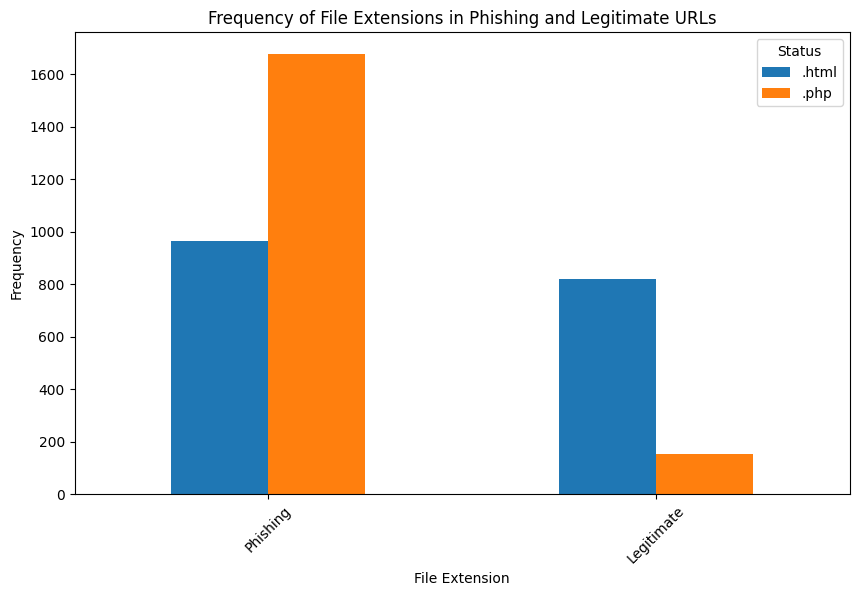

In [175]:
# Define file extensions to count
file_extensions = ['.html', '.php']  # Add more extensions as needed

# Initialize counts dictionary for each file extension
extension_counts = {ext: {'Phishing': 0, 'Legitimate': 0} for ext in file_extensions}

# Iterate over each URL and count occurrences of file extensions
for url, status in zip(df['url'], df['status']):
    for ext in file_extensions:
        if ext in url:
            if status == 1:
                extension_counts[ext]['Phishing'] += 1
            else:
                extension_counts[ext]['Legitimate'] += 1

# Convert counts dictionary to DataFrame for visualization
counts_df = pd.DataFrame(extension_counts)

# Plot bar chart to visualize frequency of each file extension for phishing and legitimate URLs
counts_df.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of File Extensions in Phishing and Legitimate URLs')
plt.xlabel('File Extension')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()


In [176]:
df = df.drop(columns=['id', 'url'])


## Target Variable Count

I want to see whether the target variable is evenly split to prevent biases on the model. If the data distribution is heavily one sided, the model would be bias which resulting an unbalanced model.

status
0    9716
1    9715
Name: count, dtype: int64


<Axes: title={'center': 'Count the target variable'}, xlabel='status'>

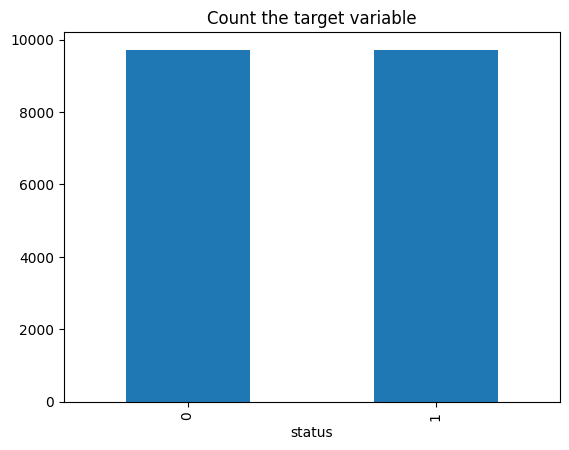

In [177]:
print(df['status'].value_counts())
df['status'].value_counts().plot(kind='bar', title='Count the target variable')    

Turns out the data is evenly split, hence I do not need to do anything about it.

# 💡 Feature selection


## Heatmap

A heatmap will be used to select a suitable set of features to predict the `status` target upon. At this stage, I have zero idea which feature to use and I utilized heatmap to find features with the most corellation with the target feature.

In [178]:
corr = df.corr()
plt.figure(figsize=(100, 100))
plot = sns.heatmap(corr, annot=True, fmt='.2f', linewidths=2)

## Histogram Features

Now I want to check the data frequency on each feature, it is mainly to find outliers and expect some noise on the feature selection. 

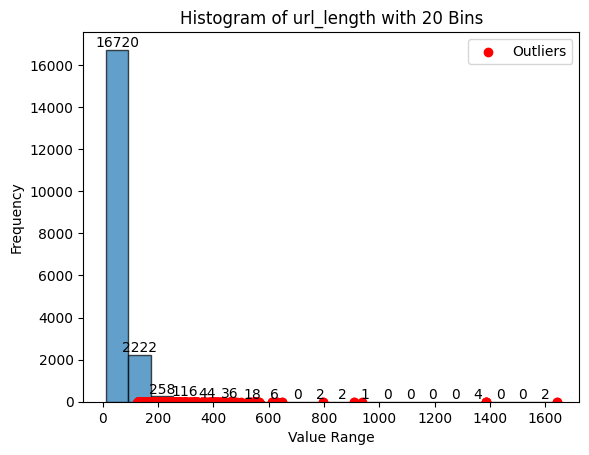

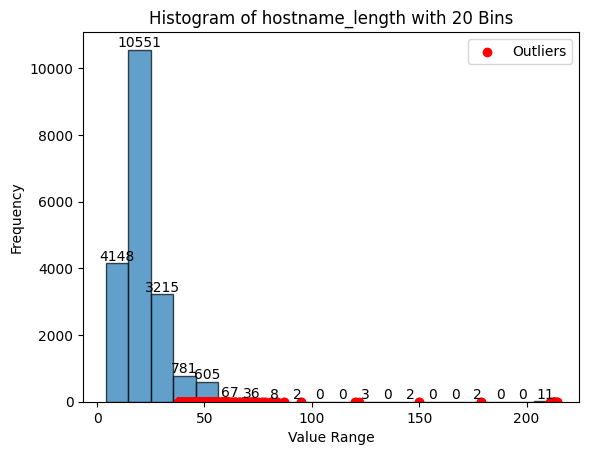

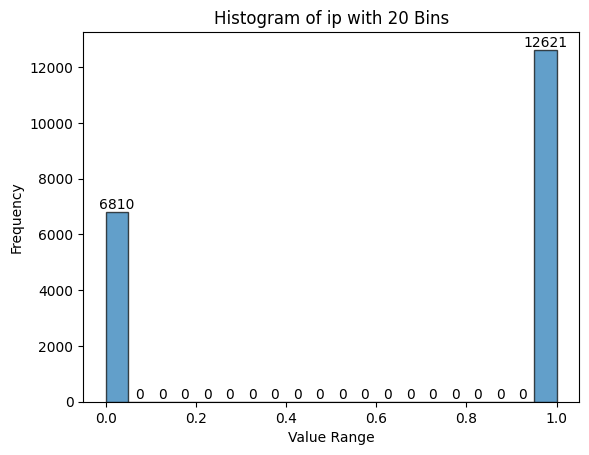

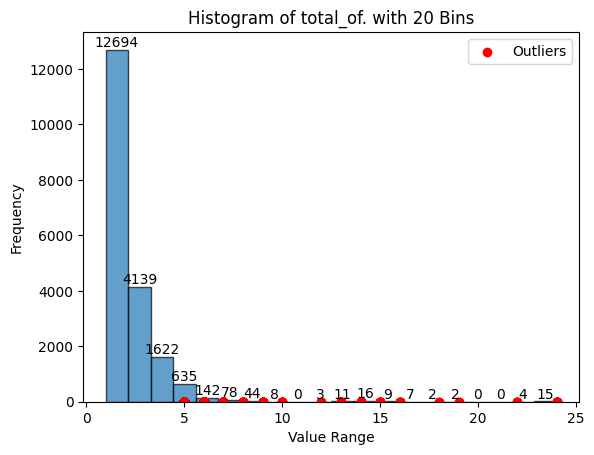

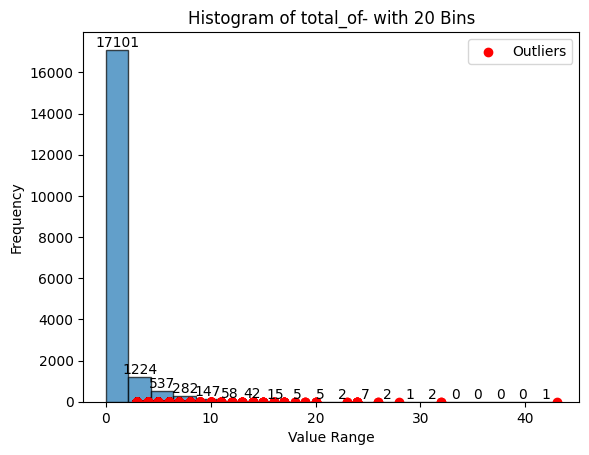

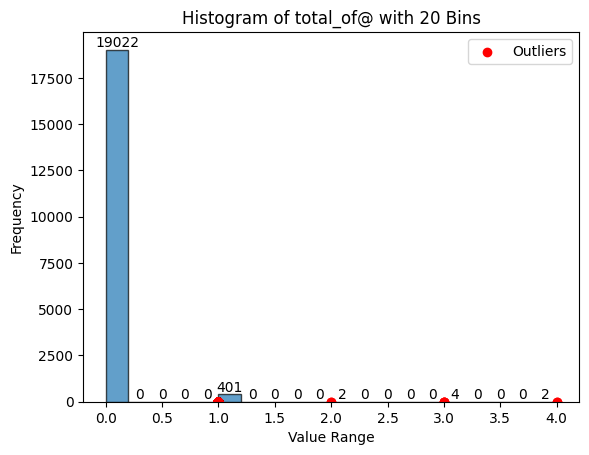

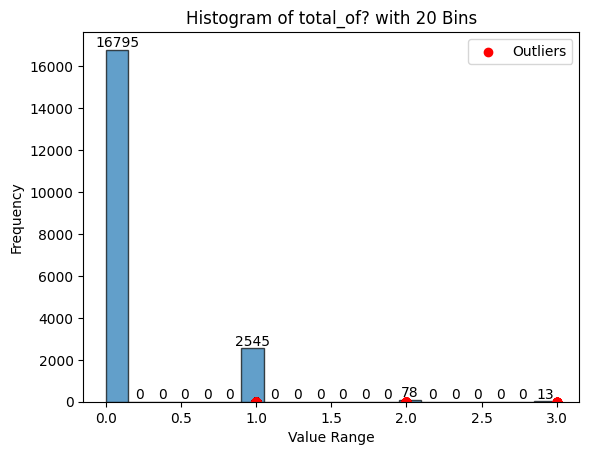

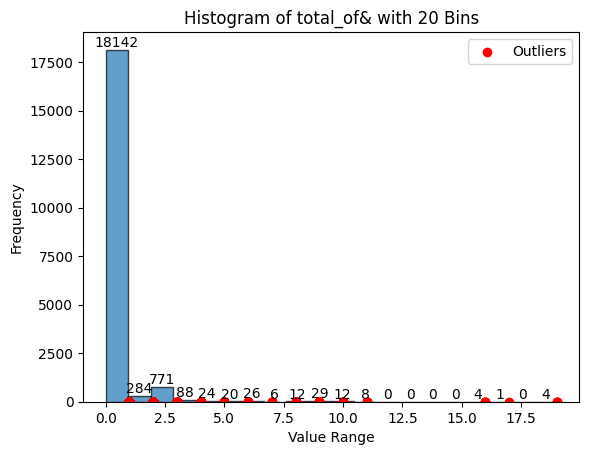

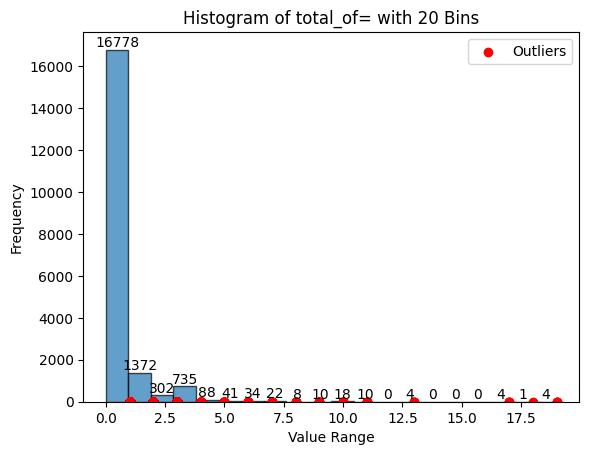

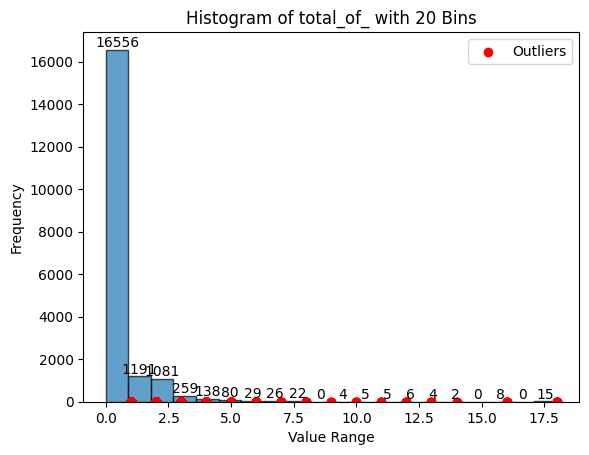

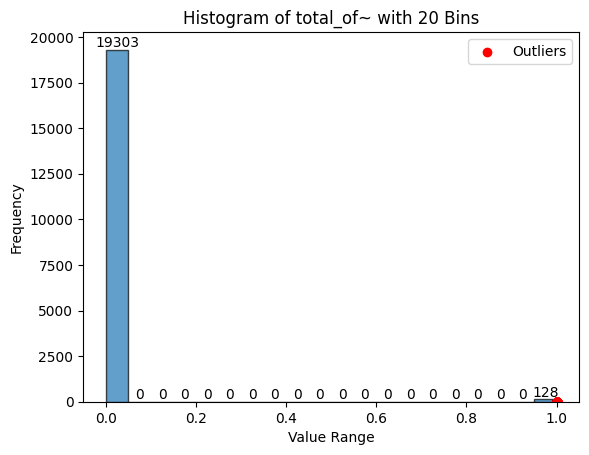

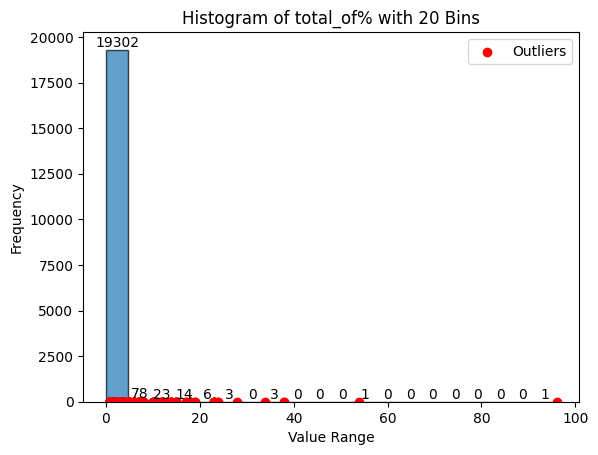

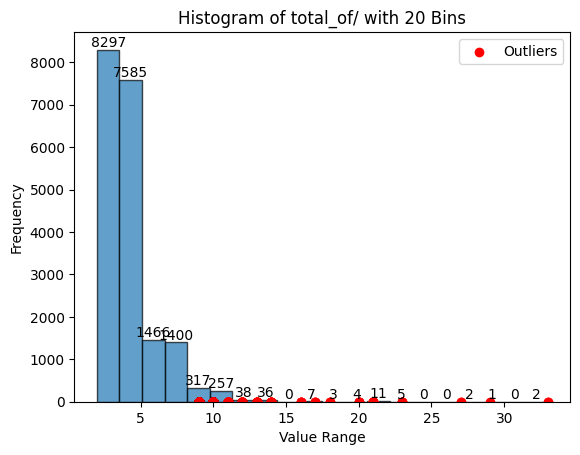

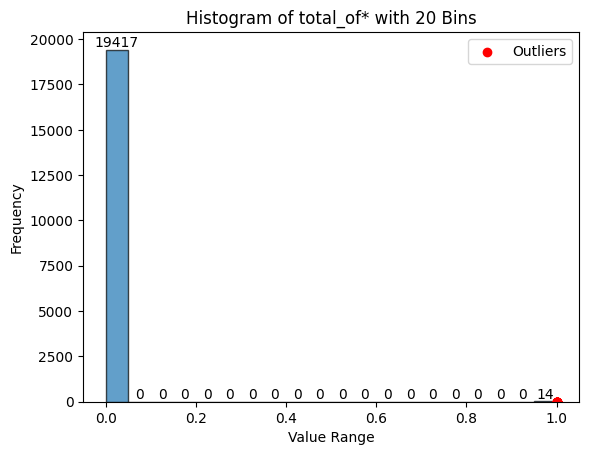

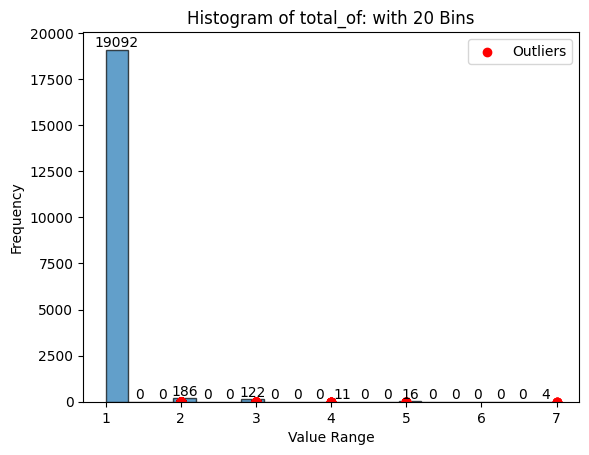

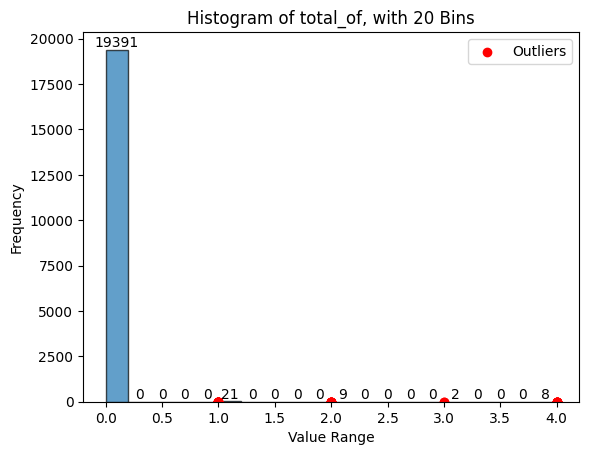

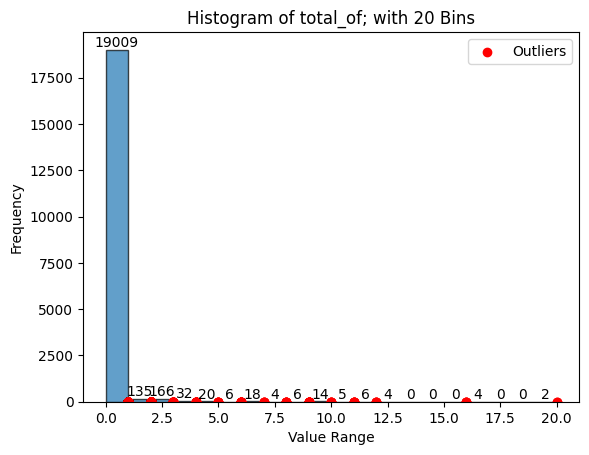

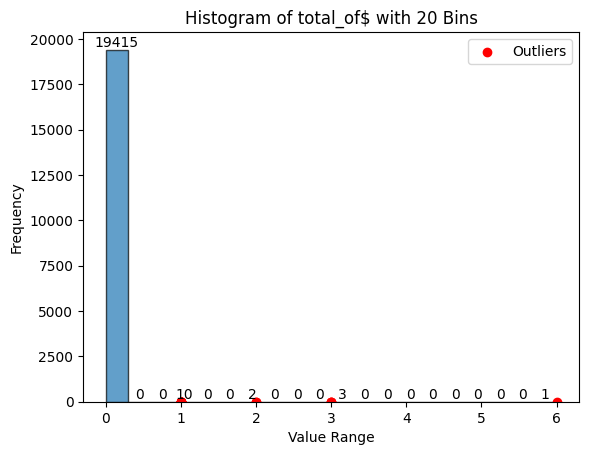

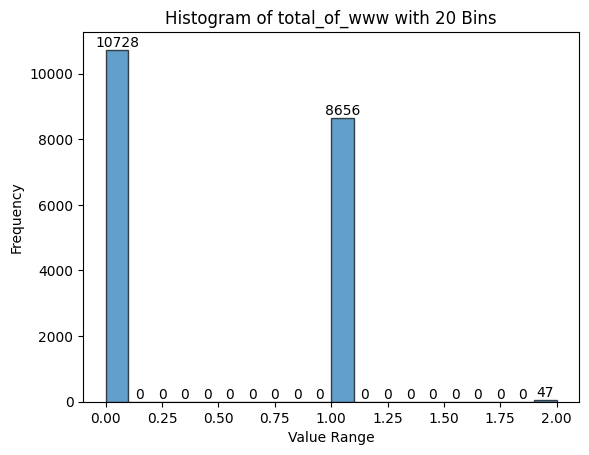

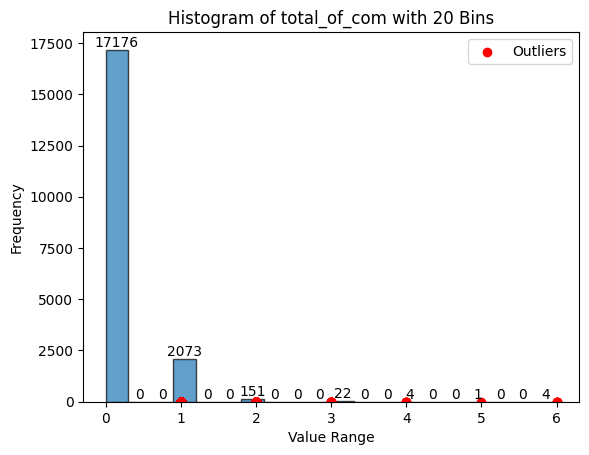

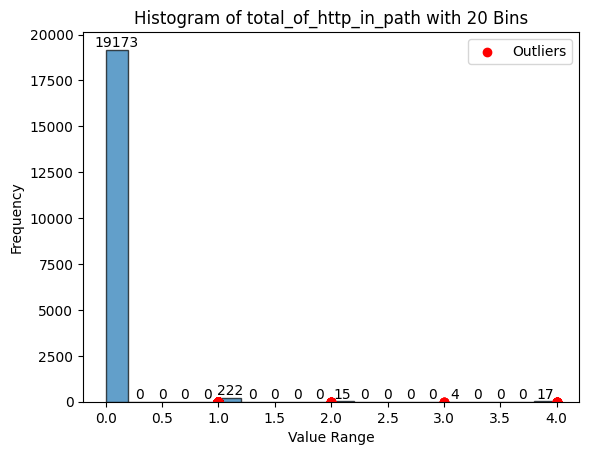

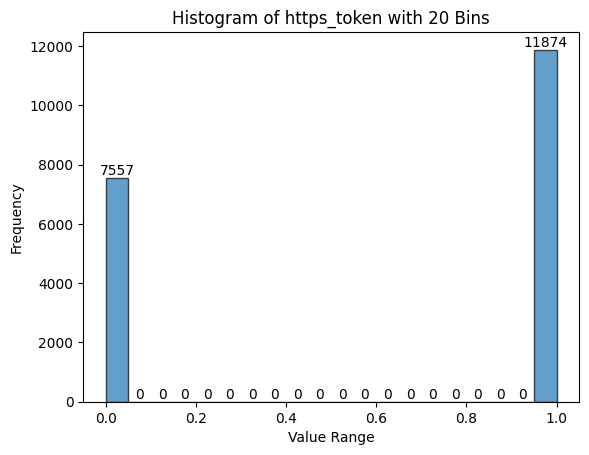

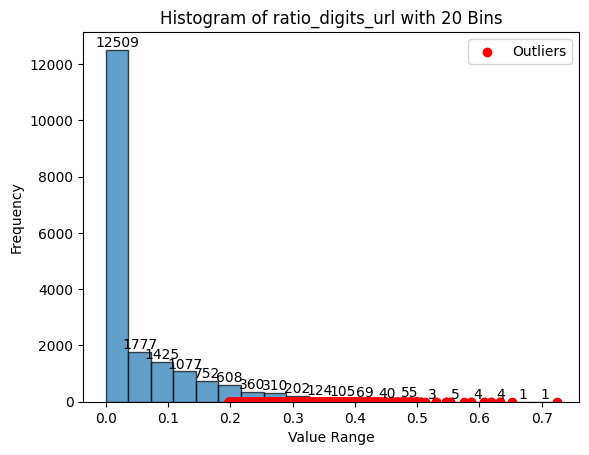

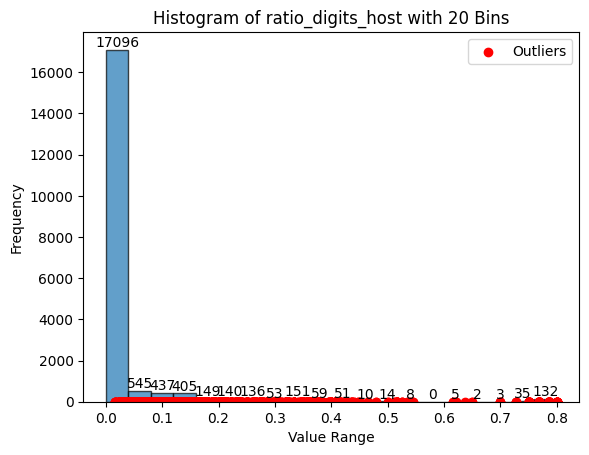

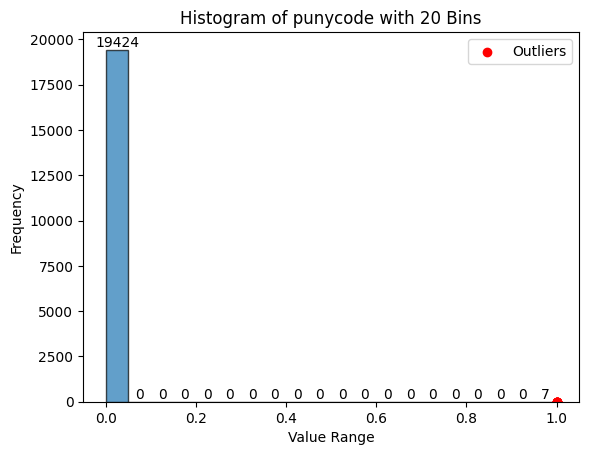

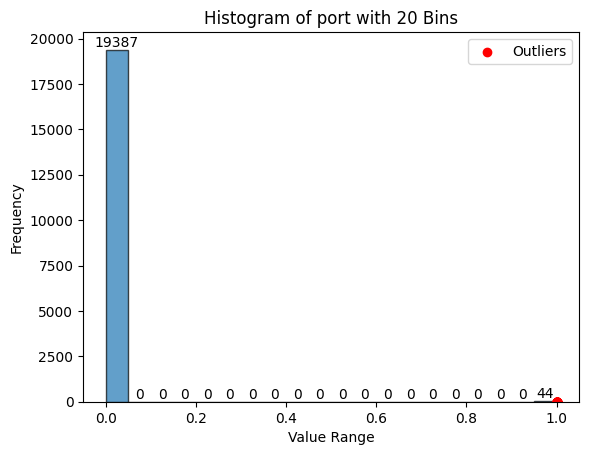

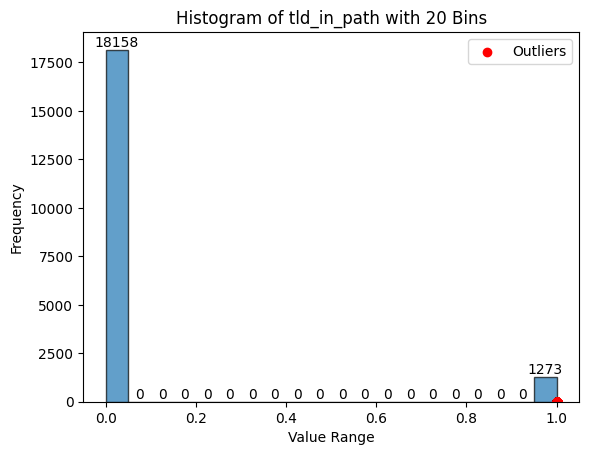

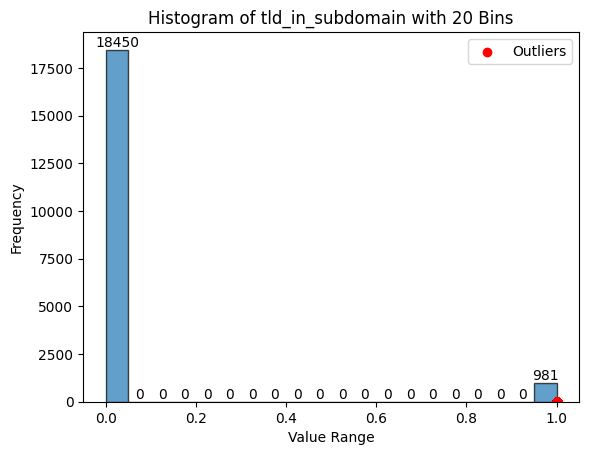

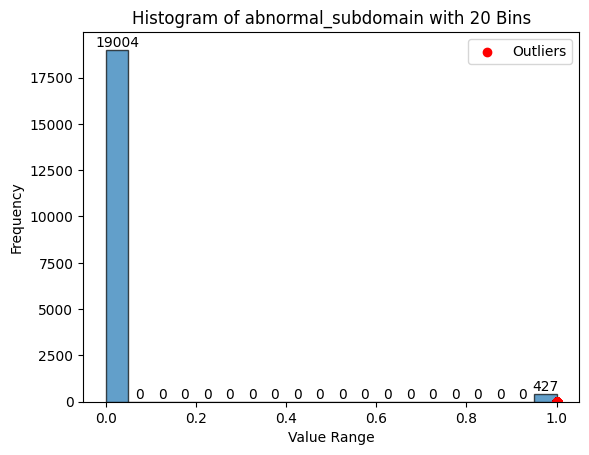

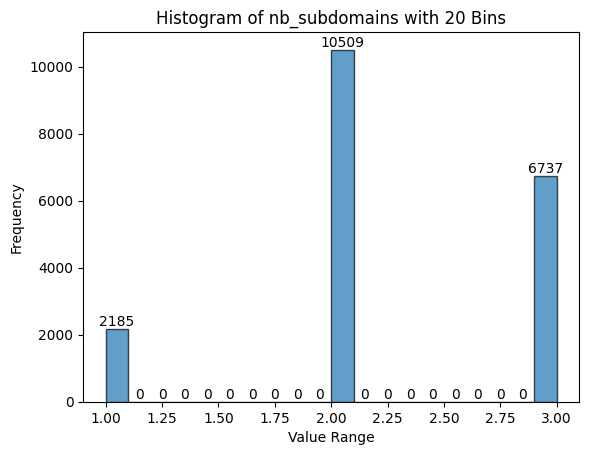

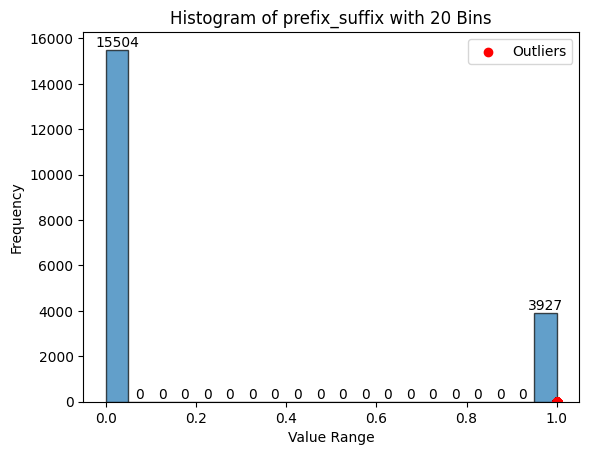

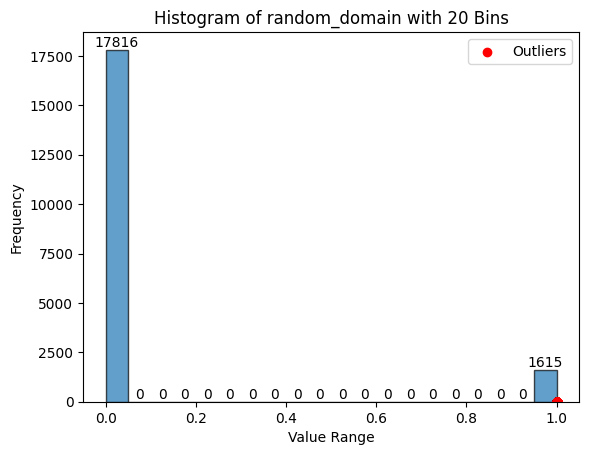

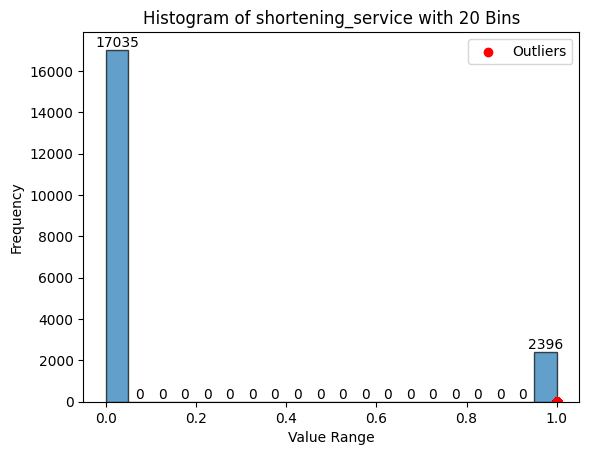

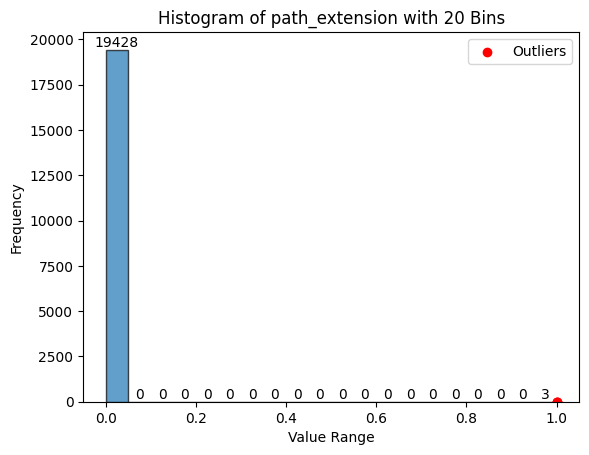

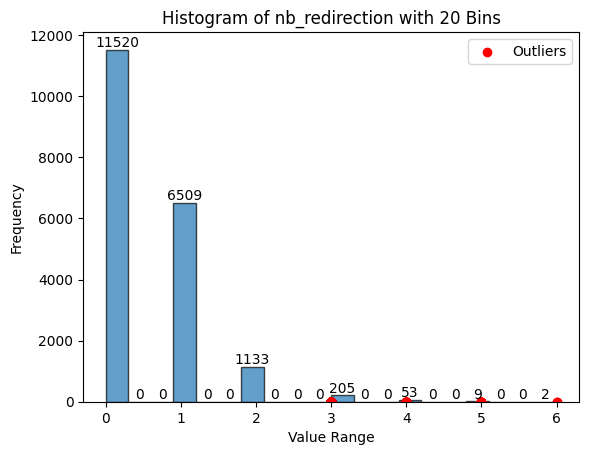

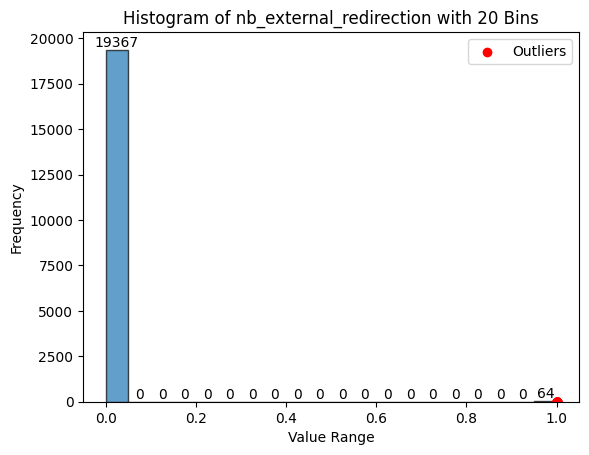

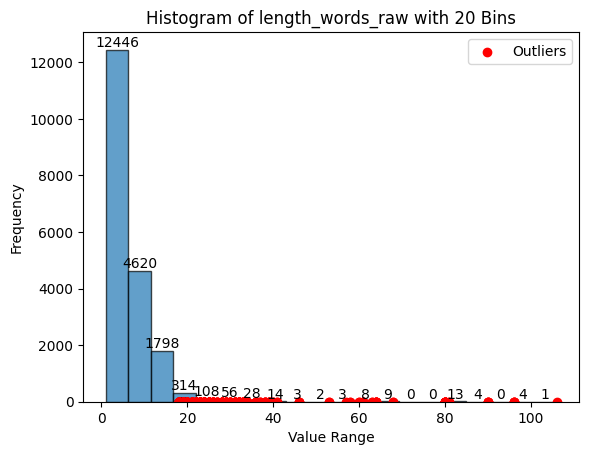

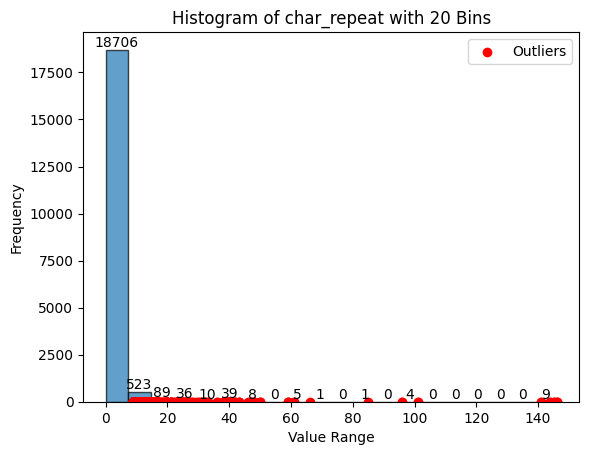

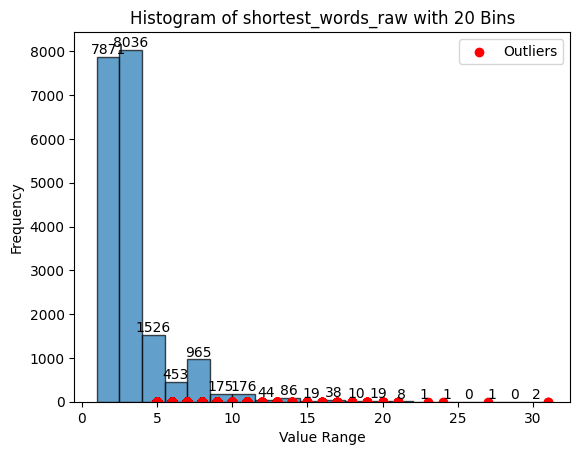

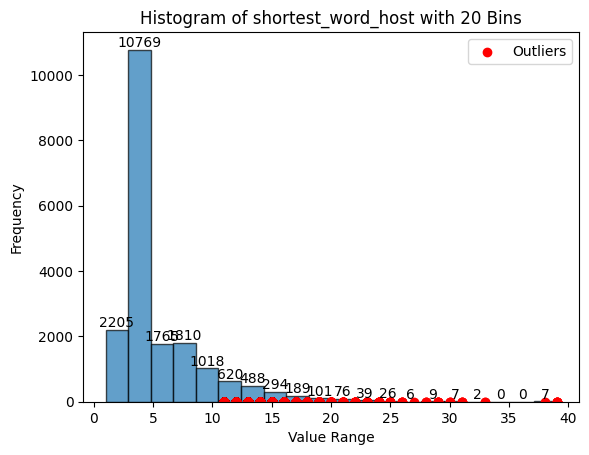

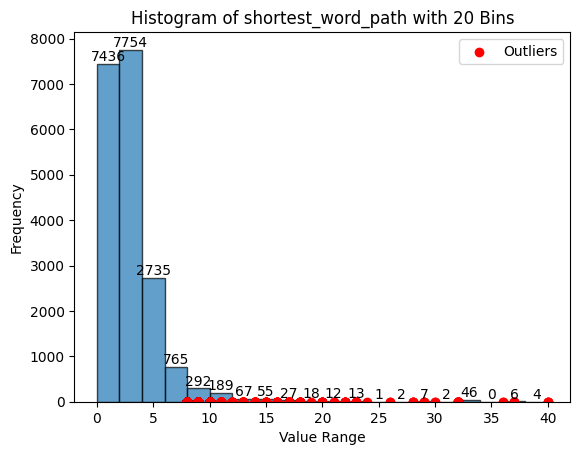

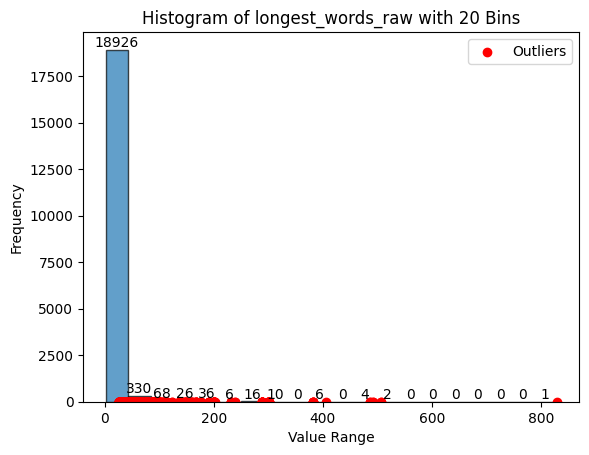

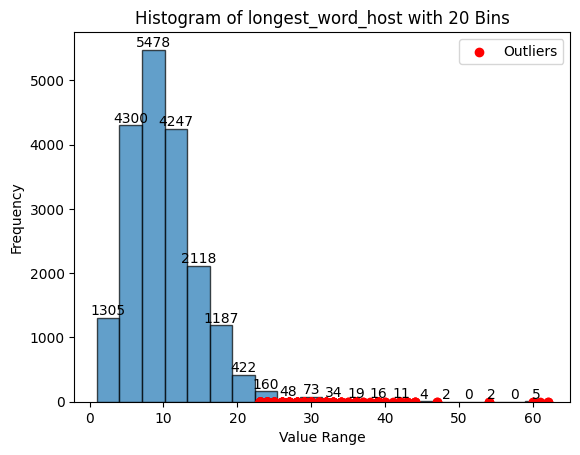

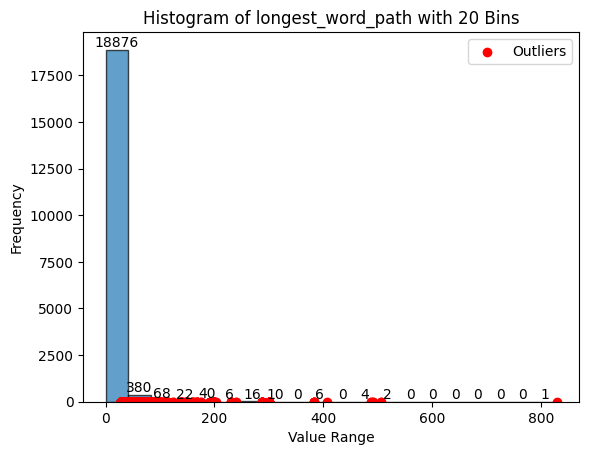

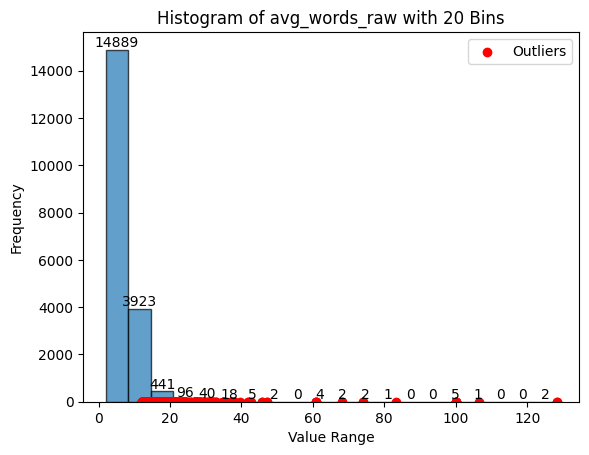

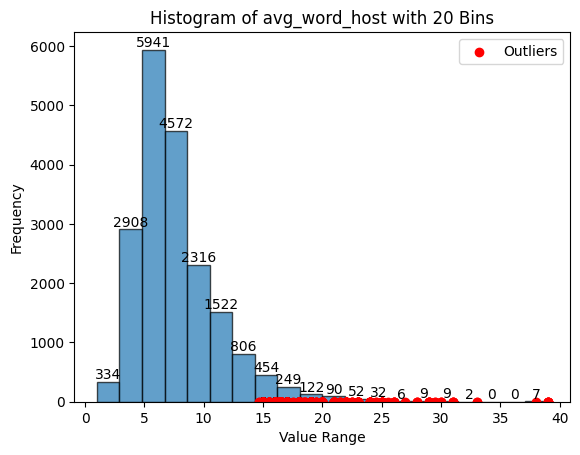

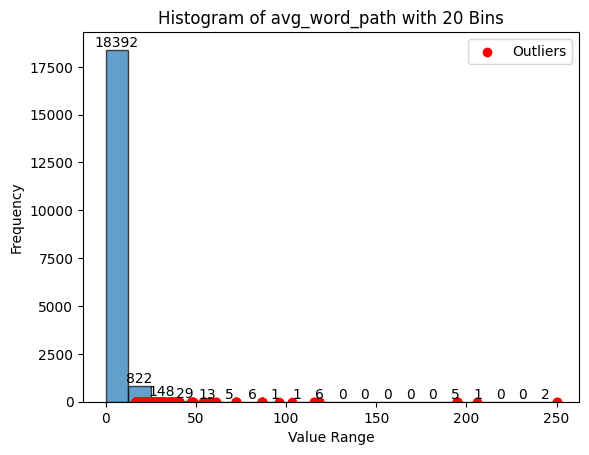

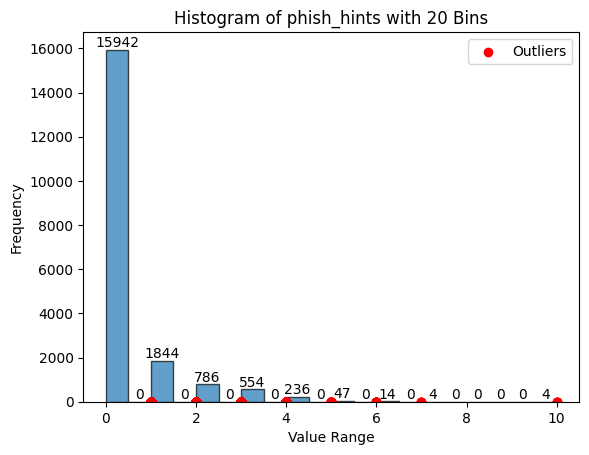

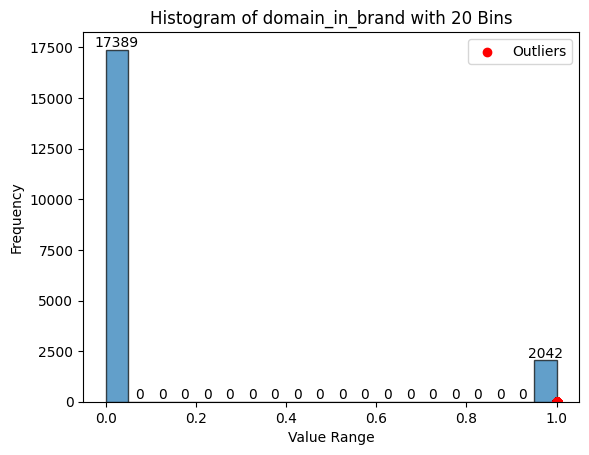

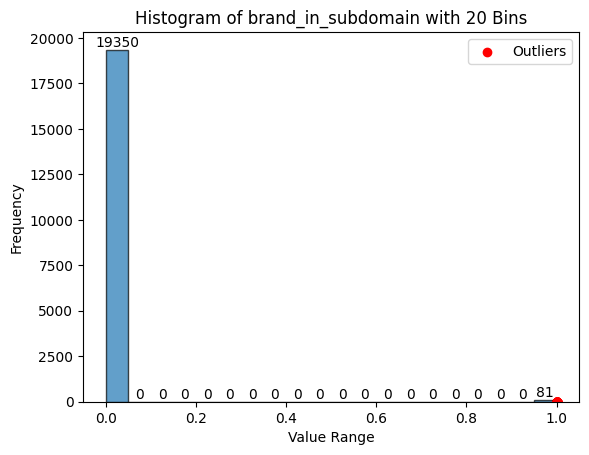

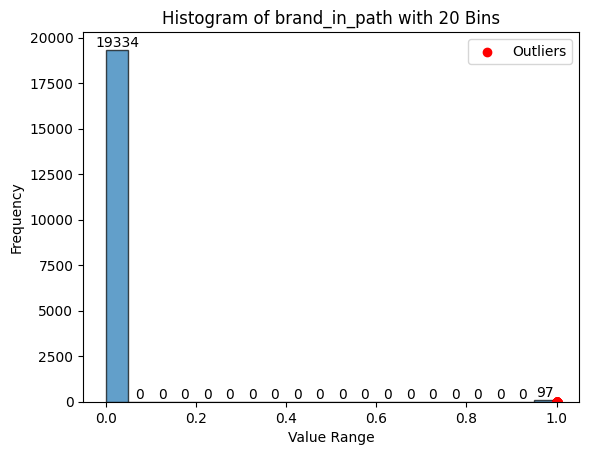

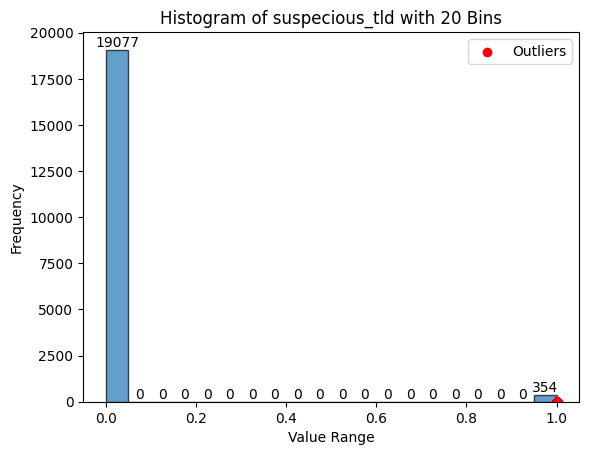

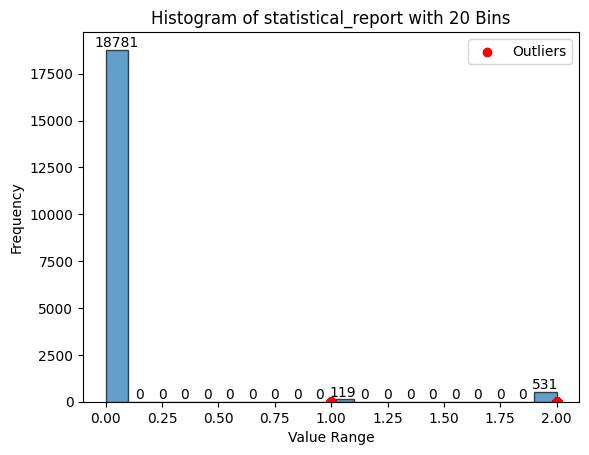

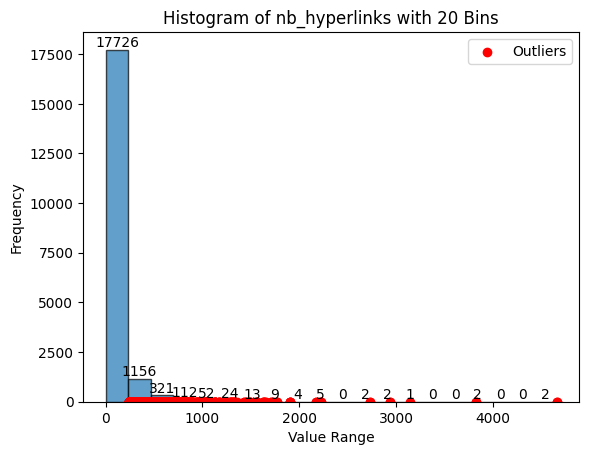

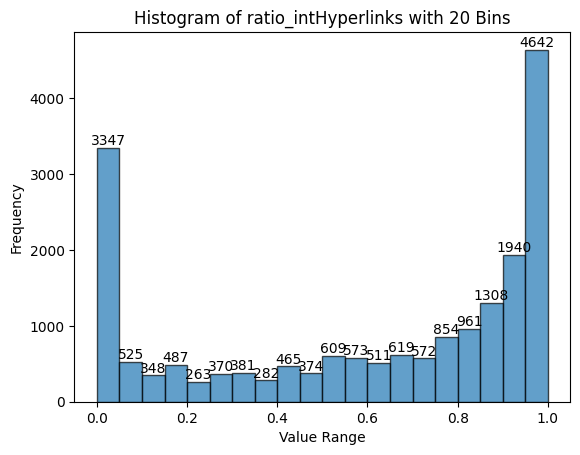

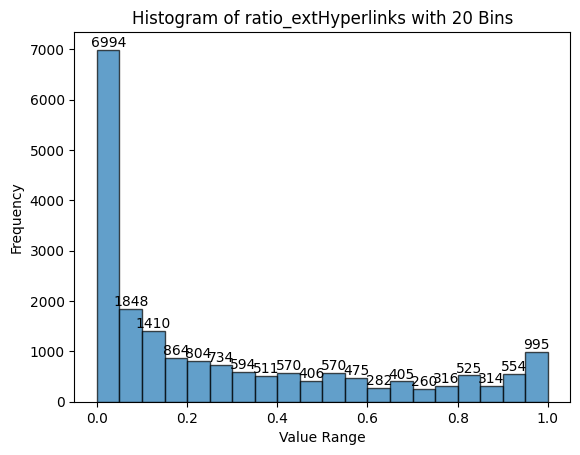

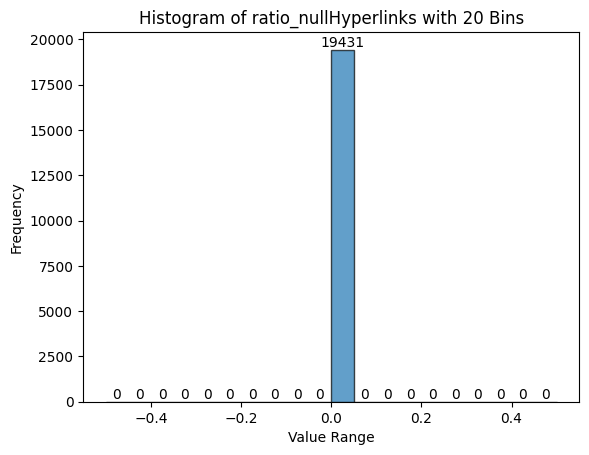

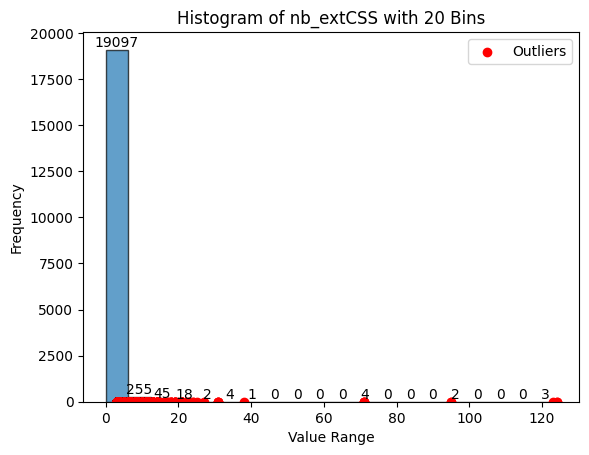

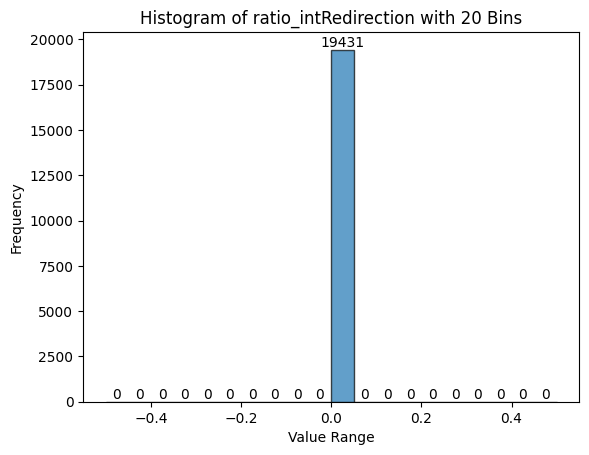

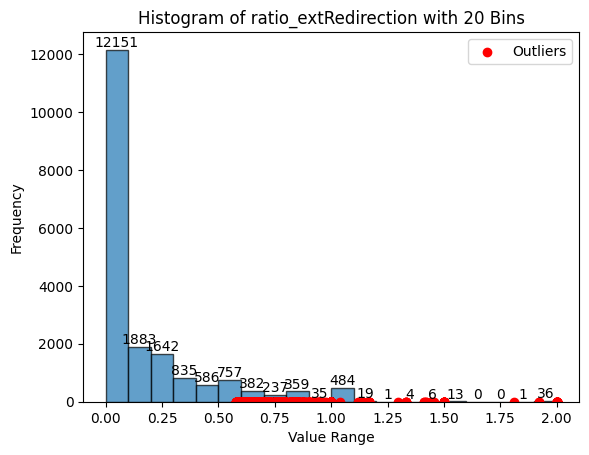

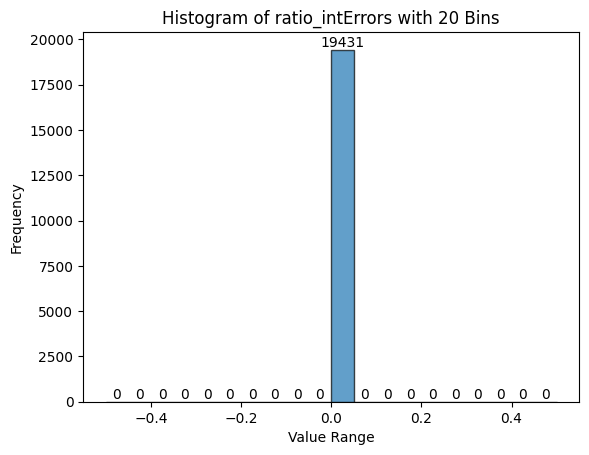

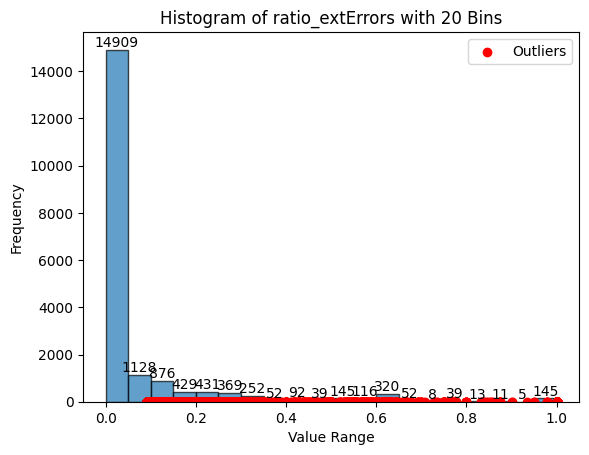

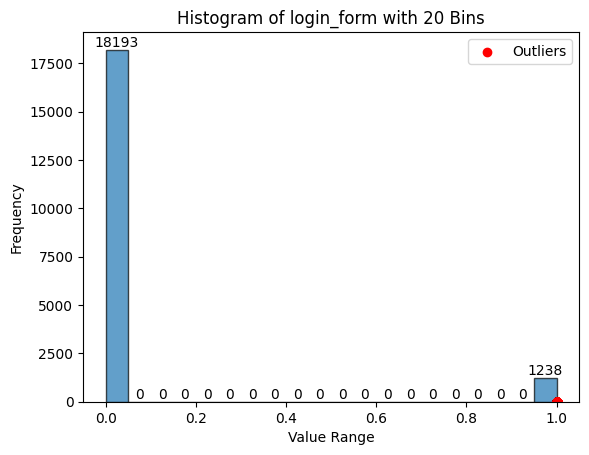

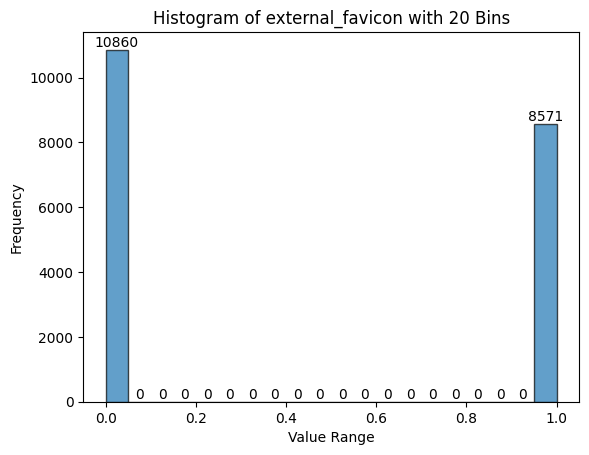

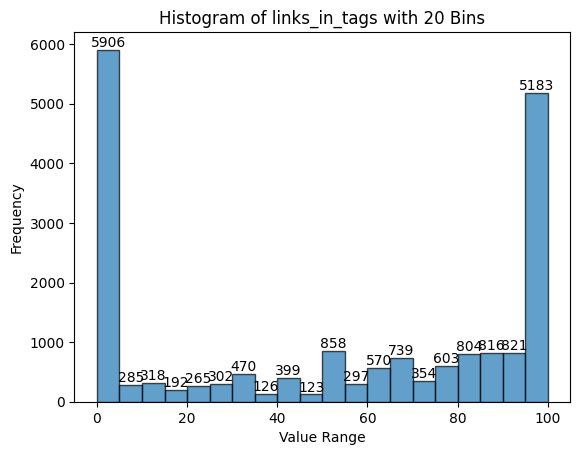

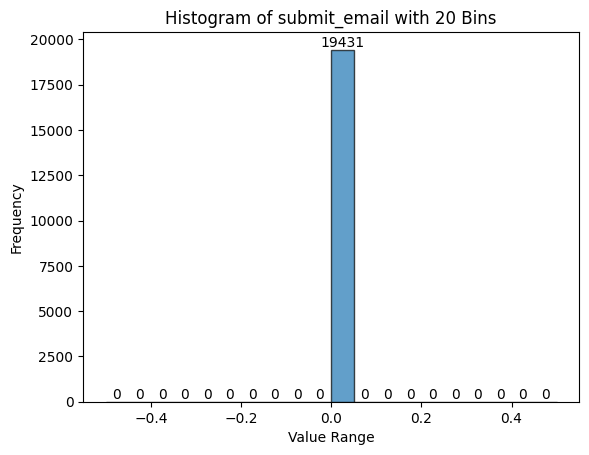

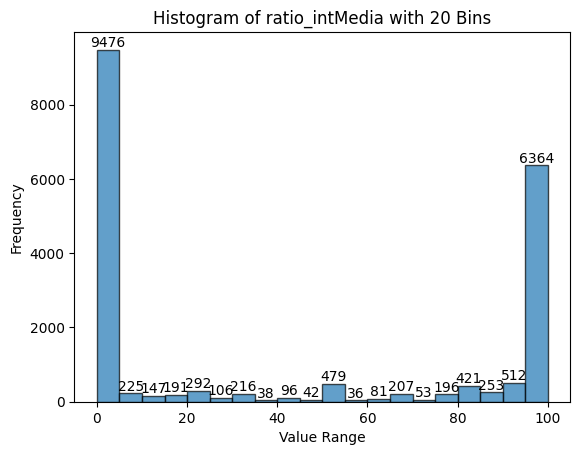

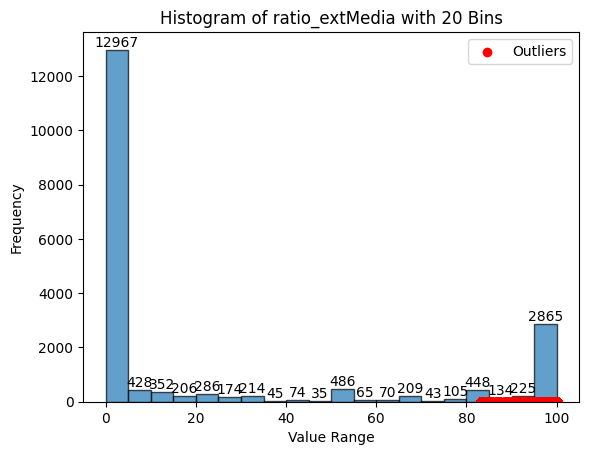

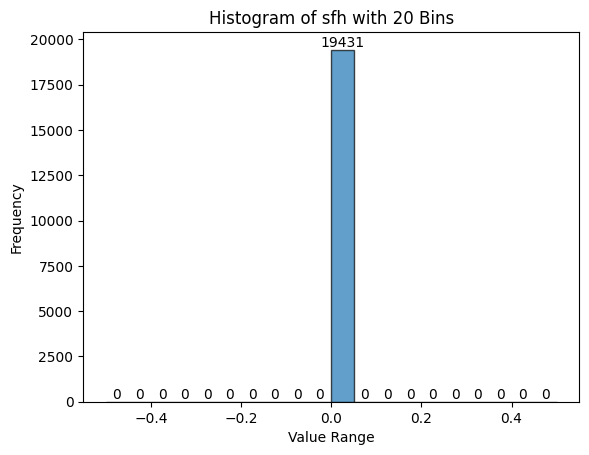

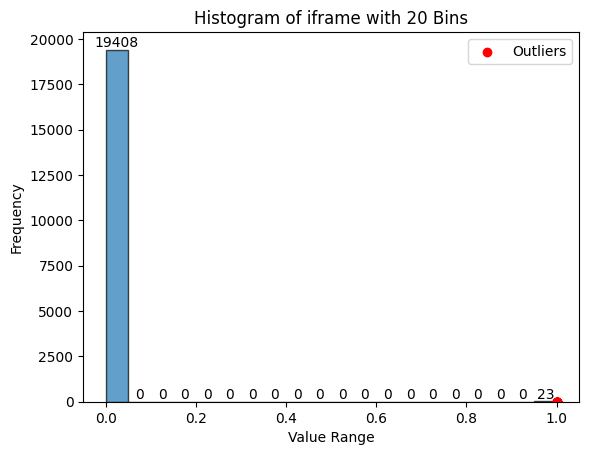

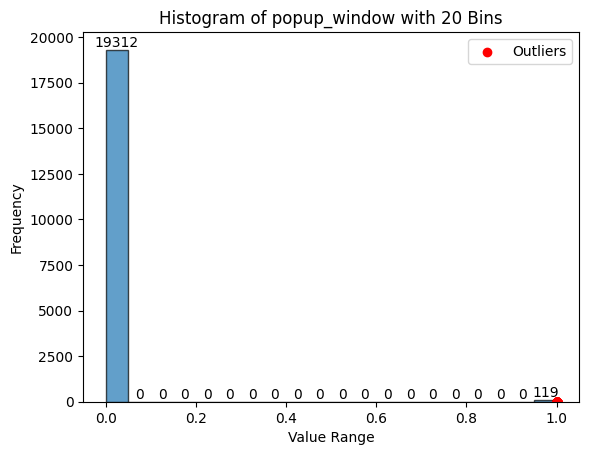

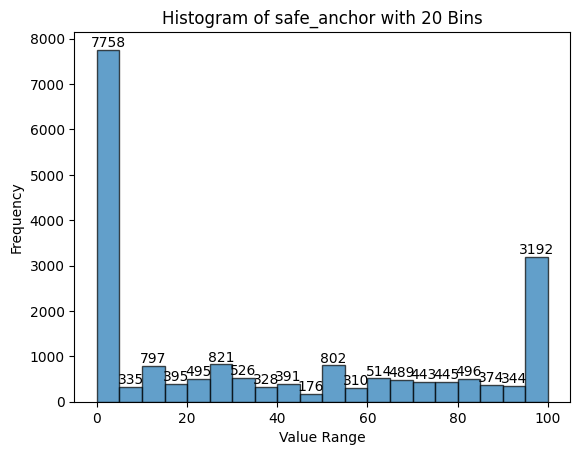

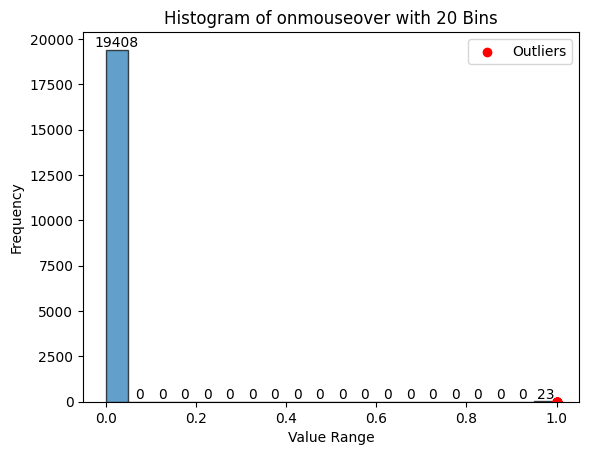

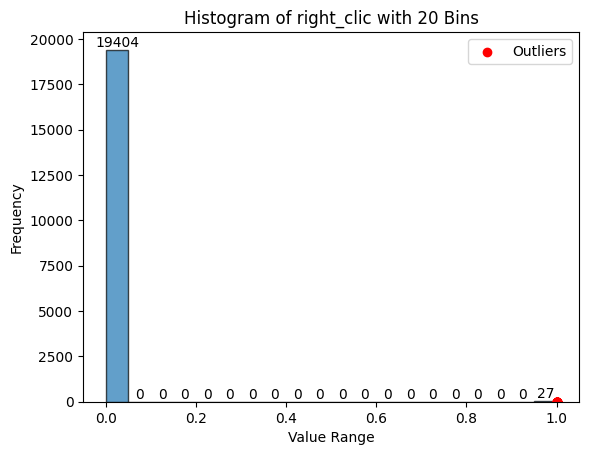

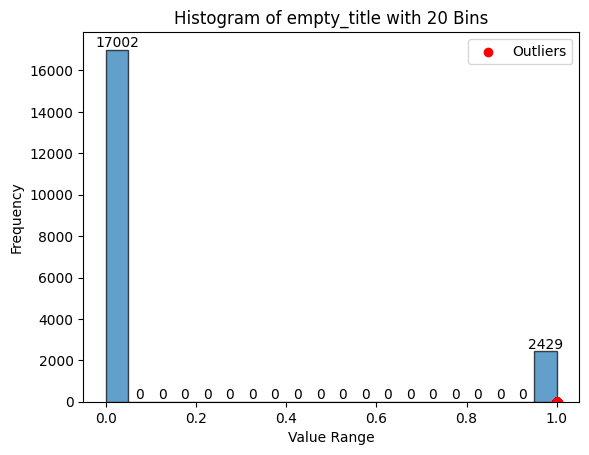

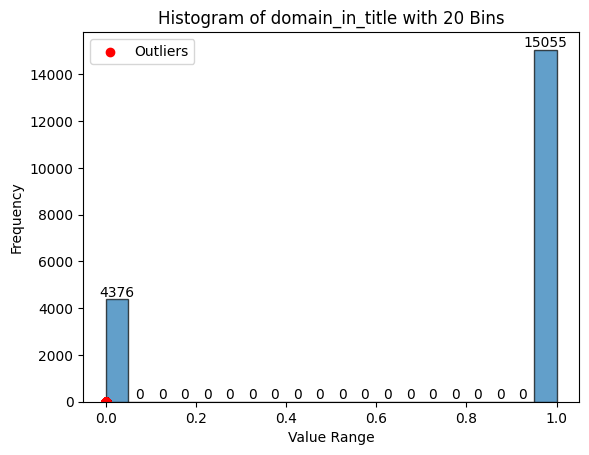

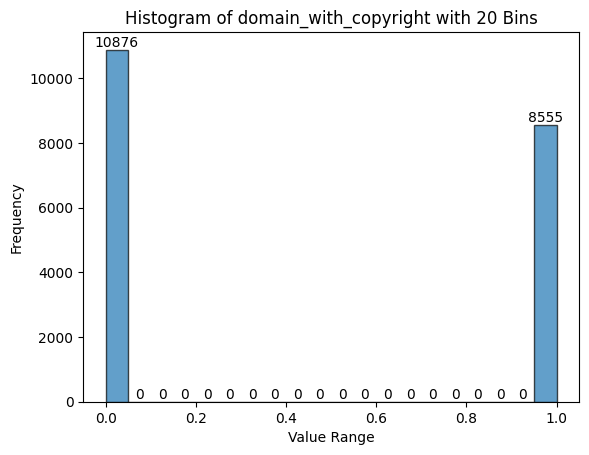

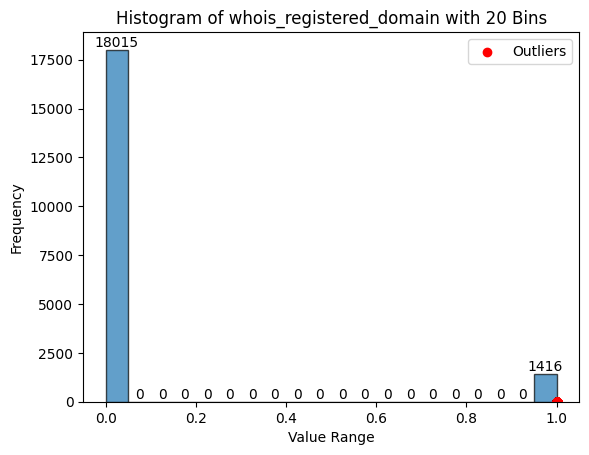

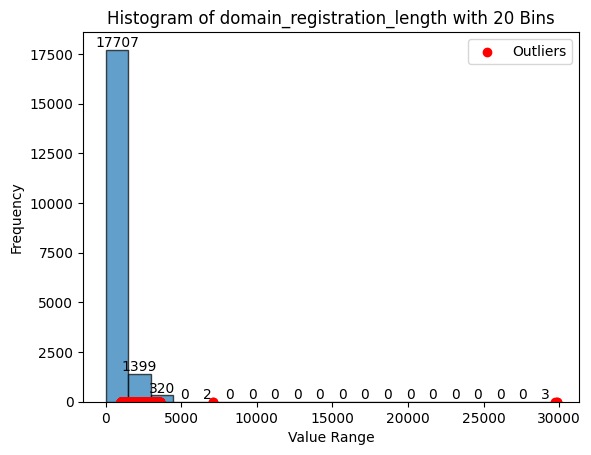

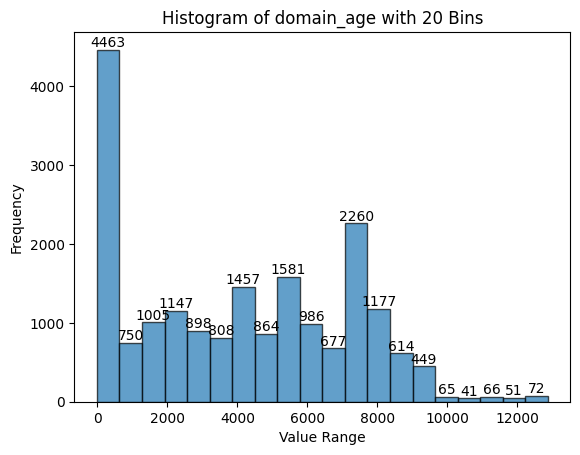

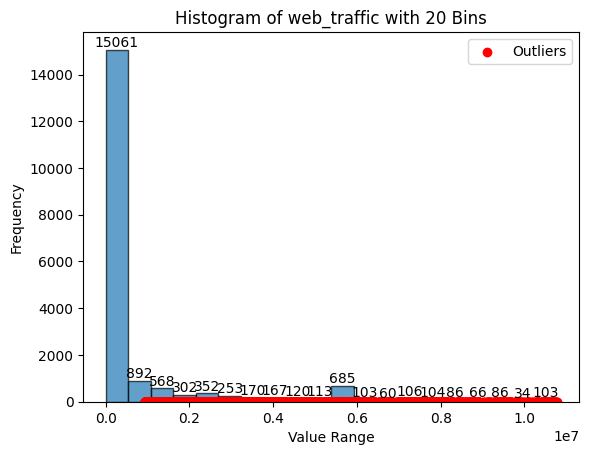

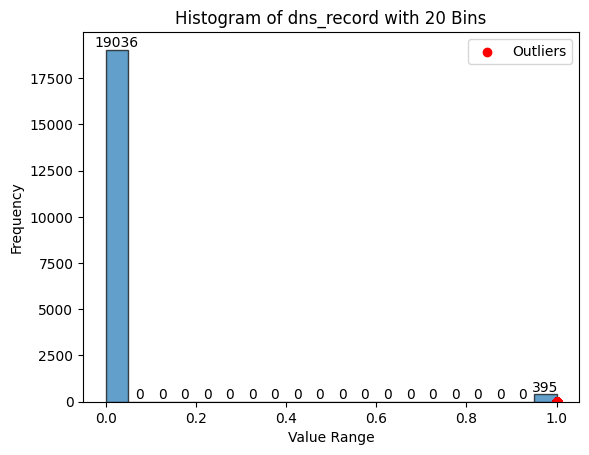

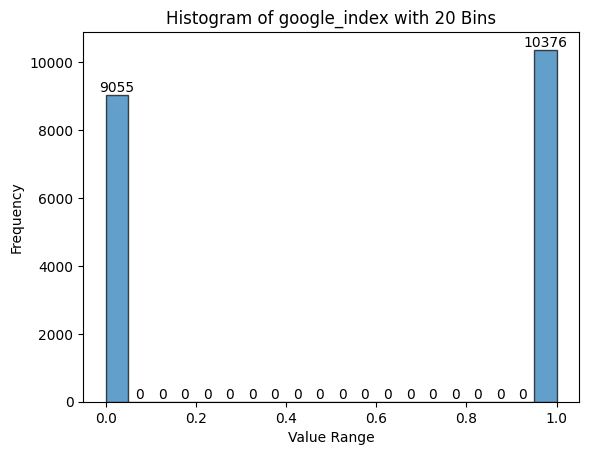

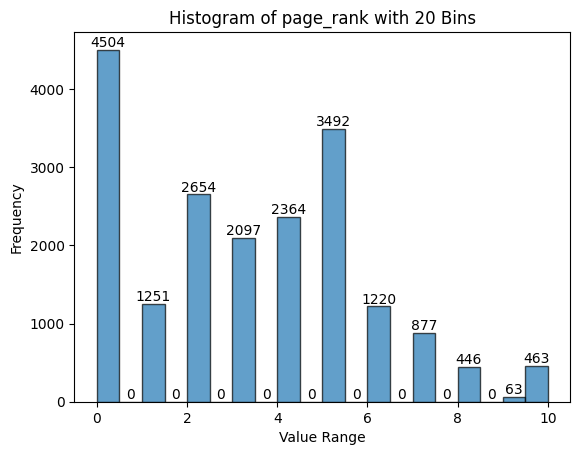

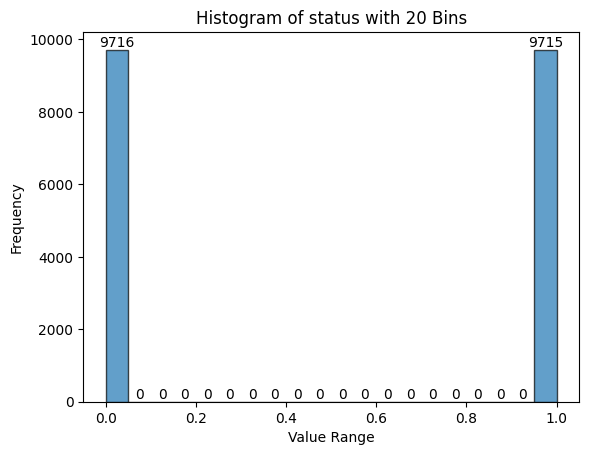

In [179]:
sorted_corr = corr.drop('status').sort_values(by='status', ascending=False)
columns = sorted_corr.dropna().columns

def plot_with_outliers(data, feature_name, num_bins=20):
    # Convert data to float
    data_float = data.astype(float)

    # Calculate quartiles and interquartile range (IQR)
    quartiles = np.percentile(data_float, [25, 50, 75])
    iqr = quartiles[2] - quartiles[0]
    
    # Determine lower and upper bounds for outliers
    lower_bound = quartiles[0] - 1.5 * iqr
    upper_bound = quartiles[2] + 1.5 * iqr
    
    # Create histogram
    counts, bins, _ = plt.hist(data_float, bins=num_bins, alpha=0.7, edgecolor='black')

    # Highlight outliers
    outliers = data_float[(data_float < lower_bound) | (data_float > upper_bound)]
    if len(outliers) > 0:
        plt.scatter(outliers, np.zeros_like(outliers), color='red', label='Outliers')

    # Add labels and title
    plt.xlabel('Value Range')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature_name} with {num_bins} Bins')

    # Add frequency counts on top of each bar
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        plt.text(x, count, str(int(count)), ha='center', va='bottom')

    # Show legend if outliers are present
    if len(outliers) > 0:
        plt.legend()

    # Show plot
    plt.show()

# Assuming 'data' is your feature data
for column in columns:
    data = df[column].dropna()
    plot_with_outliers(data, column)



After looking into the data, only a few features that contain a spreaded data into the bins. Most of the data are binary or heavily a few bins sided. It is fine I just need to take into a consideration that if I select features with heavily sided, it might cause noise. 

## Sorting the feature correlation values

To select the most suitable features for predicting the target variable (status), a heatmap was created to visualize the correlation between the features. By analyzing the heatmap, we can identify the features that have the highest positive or negative correlation with the target variable.

### Features Plot Bar

Now I want to make a bar plot of the correlation with the target variable, which helps me to identify the important featueres, understand the relationship and simplify it.

<Axes: title={'center': 'Correlation with the target variable'}>

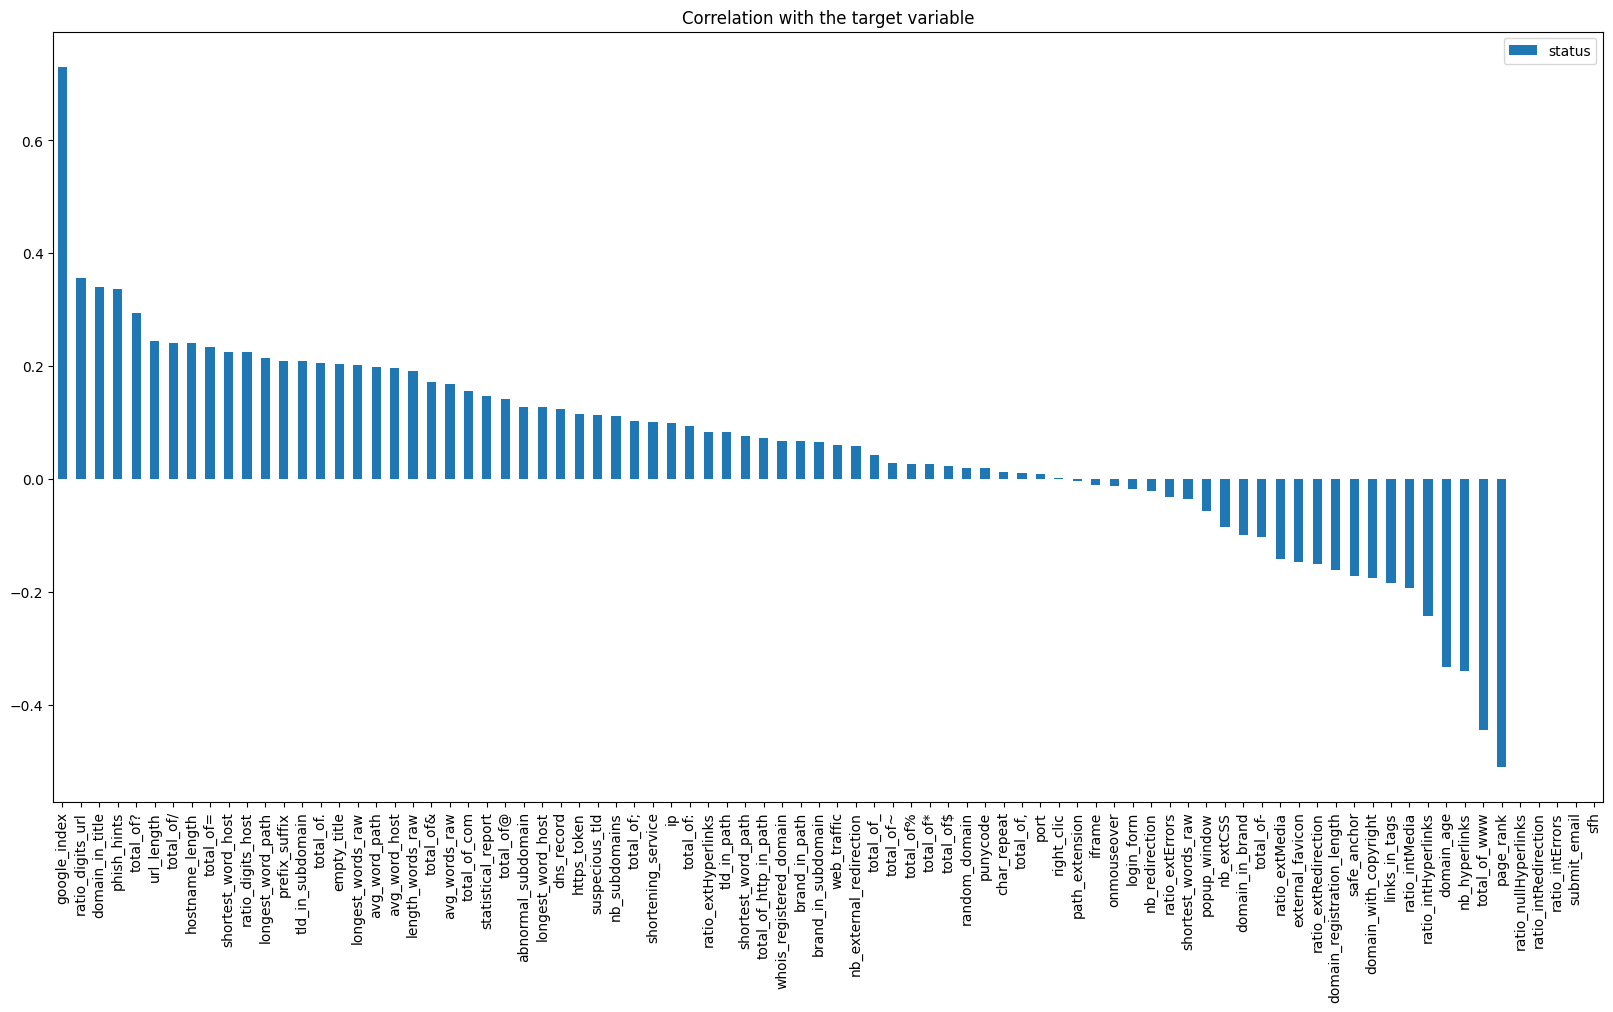

In [180]:
# Sorting the correlation values with the target variable in descending order
sorted_corr.plot.bar(y='status', title='Correlation with the target variable', figsize=(20, 10))

## Selecting Features

Now on the feature selection, I use domain understanding knowledge and data exploration research to select the features. For this iteration I want to make a model that is solely based off the URL content not the page content. For example in the dataset, it contains a feature called popup_windows. I will not use that since it requires the page to be loaded first. 

In [183]:
selected_features = ['total_of_http_in_path', 'ratio_digits_url', 'domain_in_title', 'phish_hints', 'total_of?', 'url_length', 'total_of/','hostname_length','total_of.', 'total_of=','total_of_www','ip','punycode','shortening_service','https_token']
df[selected_features] = df[selected_features].apply(pd.to_numeric, errors='coerce')

# Check the data types of the selected columns after conversion
print(df[selected_features].dtypes)

# Check if 'status' column exists and has categorical or numerical data
print(df['status'].dtype)

# Create a DataFrame with the selected columns
selected_df = df[selected_features + ['status']]
selected_df.head()

total_of_http_in_path      int64
ratio_digits_url         float64
domain_in_title            int64
phish_hints                int64
total_of?                  int64
url_length                 int64
total_of/                  int64
hostname_length            int64
total_of.                  int64
total_of=                  int64
total_of_www               int64
ip                         int64
punycode                   int64
shortening_service         int64
https_token                int64
dtype: object
int64


total_of_http_in_path  ratio_digits_url  domain_in_title  phish_hints  \
0                      0          0.108696                1            0   
1                      0          0.054688                1            2   
2                      0          0.000000                1            0   
3                      0          0.142857                1            0   
4                      0          0.000000                0            0   

   total_of?  url_length  total_of/  hostname_length  total_of.  total_of=  \
0          1          46          3               20          3          1   
1          0         128          3              120         10          0   
2          0          52          4               25          3          0   
3          0          21          3               13          2          0   
4          0          28          3               19          2          0   

   total_of_www  ip  punycode  shortening_service  https_token  status  
0             1   0         0                   0            1       1  
1             0   0         0                   0            1       1  
2             1   0         0                   0            1       1  
3             1   0         0                   0            1       0  
4             1   0         0                   0            0       0

Now I want to make a copy of the original dataframe but only containing the selected features and the target variable for the next step, which is the model training part. Also, I want to make sure that all the data are not null and numerical. 

In [184]:
# Check the data types of the selected columns after conversion
print(df[selected_features].dtypes)

# Check if 'status' column exists and has categorical or numerical data
print(df['status'].dtype)

# Create a DataFrame with the selected columns
selected_df = df[selected_features + ['status']]
selected_df.head()

total_of_http_in_path      int64
ratio_digits_url         float64
domain_in_title            int64
phish_hints                int64
total_of?                  int64
url_length                 int64
total_of/                  int64
hostname_length            int64
total_of.                  int64
total_of=                  int64
total_of_www               int64
ip                         int64
punycode                   int64
shortening_service         int64
https_token                int64
dtype: object
int64


total_of_http_in_path  ratio_digits_url  domain_in_title  phish_hints  \
0                      0          0.108696                1            0   
1                      0          0.054688                1            2   
2                      0          0.000000                1            0   
3                      0          0.142857                1            0   
4                      0          0.000000                0            0   

   total_of?  url_length  total_of/  hostname_length  total_of.  total_of=  \
0          1          46          3               20          3          1   
1          0         128          3              120         10          0   
2          0          52          4               25          3          0   
3          0          21          3               13          2          0   
4          0          28          3               19          2          0   

   total_of_www  ip  punycode  shortening_service  https_token  status  
0             1   0         0                   0            1       1  
1             0   0         0                   0            1       1  
2             1   0         0                   0            1       1  
3             1   0         0                   0            1       0  
4             1   0         0                   0            0       0

Now I want to find the correlation and making sure that it has a pretty good correlation. 

In [185]:
correlation_matrix = df.corr(numeric_only=True)
sorted_corr = correlation_matrix.sort_values(by='status',ascending=False)
sorted_corr

url_length  hostname_length        ip  total_of.  \
status                   0.244348         0.240681  0.098335   0.205302   
ratio_digits_url         0.434626         0.171761  0.236567   0.224194   
domain_in_title          0.124224         0.218850  0.045277   0.108442   
phish_hints              0.332000        -0.019901  0.038903   0.168765   
total_of?                0.523172         0.164129  0.127186   0.353133   
url_length               1.000000         0.217586  0.139063   0.447198   
total_of/                0.486490        -0.061203  0.072536   0.242216   
hostname_length          0.217586         1.000000  0.077150   0.406834   
total_of=                0.631574         0.179735  0.134242   0.423621   
total_of.                0.447198         0.406834  0.086433   1.000000   
https_token             -0.001485         0.022880  0.005861   0.046955   
shortening_service      -0.001243         0.178543 -0.008619   0.072809   
ip                       0.139063         0.077150  1.000000   0.086433   
total_of_http_in_path    0.341061        -0.047637  0.035054   0.466479   
punycode                 0.009074        -0.000432  0.002577  -0.000782   
domain_with_copyright   -0.004281         0.073107  0.004624   0.057320   
total_of_www            -0.067973        -0.130991 -0.045816   0.068290   

                       total_of?  total_of=  total_of/  total_of_www  \
status                  0.293920   0.233048   0.240892     -0.444561   
ratio_digits_url        0.325739   0.327688   0.206925     -0.211165   
domain_in_title         0.092191   0.088040   0.088462     -0.178402   
phish_hints             0.208052   0.205732   0.501321     -0.090812   
total_of?               1.000000   0.730047   0.243749     -0.115337   
url_length              0.523172   0.631574   0.486490     -0.067973   
total_of/               0.243749   0.211793   1.000000     -0.005628   
hostname_length         0.164129   0.179735  -0.061203     -0.130991   
total_of=               0.730047   1.000000   0.211793     -0.082786   
total_of.               0.353133   0.423621   0.242216      0.068290   
https_token            -0.090365  -0.073089   0.080103     -0.035303   
shortening_service     -0.011094  -0.020057  -0.096788     -0.155461   
ip                      0.127186   0.134242   0.072536     -0.045816   
total_of_http_in_path   0.284785   0.398505   0.233863      0.047554   
punycode                0.014959   0.013119   0.025853     -0.006220   
domain_with_copyright  -0.046123   0.005970  -0.023213      0.087826   
total_of_www           -0.115337  -0.082786  -0.005628      1.000000   

                       total_of_http_in_path  https_token  ratio_digits_url  \
status                              0.071824     0.115132          0.356587   
ratio_digits_url                    0.052074     0.054736          1.000000   
domain_in_title                     0.015466     0.174153          0.152393   
phish_hints                         0.135210     0.111235          0.096967   
total_of?                           0.284785    -0.090365          0.325739   
url_length                          0.341061    -0.001485          0.434626   
total_of/                           0.233863     0.080103          0.206925   
hostname_length                    -0.047637     0.022880          0.171761   
total_of=                           0.398505    -0.073089          0.327688   
total_of.                           0.466479     0.046955          0.224194   
https_token                        -0.020016     1.000000          0.054736   
shortening_service                 -0.007165    -0.027343          0.005285   
ip                                  0.035054     0.005861          0.236567   
total_of_http_in_path               1.000000    -0.020016          0.052074   
punycode                            0.029407     0.015145         -0.000225   
domain_with_copyright              -0.024613    -0.045686         -0.027357   
total_of_www                    

In [207]:
# Get all the correlated features with the target variable
num_features = len(sorted_corr['status'])
print(f'Total number of features, without the target variable: {num_features -1}')
sorted_corr['status'].head(num_features)

Total number of features, without the target variable: 16


status                   1.000000
ratio_digits_url         0.356587
domain_in_title          0.339519
phish_hints              0.337287
total_of?                0.293920
url_length               0.244348
total_of/                0.240892
hostname_length          0.240681
total_of=                0.233048
total_of.                0.205302
https_token              0.115132
shortening_service       0.101135
ip                       0.098335
total_of_http_in_path    0.071824
punycode                 0.018985
domain_with_copyright   -0.175469
total_of_www            -0.444561
Name: status, dtype: float64

Because I only select features based off the URL content, the correlation is not high which might cause a low model accuracy. But for this iteration, it is fine and I would refine it later.

# Defining target variable and feature variables

In this section I want to split the target and feature variables into X and y.

In [187]:
target = 'status'

X = df[selected_features]
y = df[target]

## 🪓 Splitting into train/test

Splitting the train and test set 80% and 20% respectively. So around 15.5k are in train set and 4k in test set.

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 19431 observations, of which 15544 are now in the train set, and 3887 in the test set.


# 🧬 Modelling

In this section, I want to try a few different models and how they perform compared to other models. Also, at the end I will stack some of the models. 


### 🏘️ K-NEAREST NEIGBOURS

This code implements the K-Nearest Neighbors (KNN) classification algorithm. KNN works by finding the 'k' nearest data points in the training set to a given input, and the majority class among those neighbors is assigned to the input.

In [189]:
# K-NEAREST NEIGHBORS
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
KNN_score = KNN.score(X_test, y_test)
print("Accuracy:", KNN_score)

Accuracy: 0.8577308978646772


Creating the classification report

In [190]:
predictions_KNN = KNN.predict(X_test)
report_KNN = classification_report(y_test, predictions_KNN)
print(report_KNN)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1979
           1       0.86      0.85      0.85      1908

    accuracy                           0.86      3887
   macro avg       0.86      0.86      0.86      3887
weighted avg       0.86      0.86      0.86      3887



## 🌳🌳🌳 Random Forest Regressor


This code uses a machine learning method called Random Forest, which creates a powerful model by combining many decision trees. It trains this model with training data and evaluates its accuracy with test data, displaying the accuracy score.

In [191]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 500, max_depth=25, n_jobs=-1)
random_forest.fit(X_train, y_train)
rf_score = random_forest.score(X_test, y_test)
print("Accuracy:", rf_score)

Accuracy: 0.783902607865141


In [192]:
predictions_rf = random_forest.predict(X_test)
report_rf = classification_report(y_test, predictions_rf.round())
print(report_rf)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1979
           1       0.93      0.94      0.94      1908

    accuracy                           0.94      3887
   macro avg       0.94      0.94      0.94      3887
weighted avg       0.94      0.94      0.94      3887



## 🌳🌳🌳 Random Forest with ADA Boost

In [193]:
# AdaBoost with Random Forest
from sklearn.ensemble import AdaBoostRegressor

adaboost_random_forest = AdaBoostRegressor(estimator=random_forest, n_estimators=50, random_state=21)
adaboost_random_forest.fit(X_train, y_train)
ada_rf_score = adaboost_random_forest.score(X_test, y_test)
print("Accuracy:", ada_rf_score)

Accuracy: 0.7627018678161648


In [194]:
predictions_ada_rf = adaboost_random_forest.predict(X_test)
report_ada_rf = classification_report(y_test, predictions_ada_rf.round())
print(report_ada_rf)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1979
           1       0.93      0.94      0.94      1908

    accuracy                           0.94      3887
   macro avg       0.94      0.94      0.94      3887
weighted avg       0.94      0.94      0.94      3887



## 🌳 Decision Tree

In [195]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(min_samples_leaf=20, min_samples_split=200)
decision_tree.fit(X_train, y_train)
DT_score = decision_tree.score(X_test, y_test)
print("Accuracy:", DT_score)

Accuracy: 0.849241059943401


In [196]:
predictions_DT = decision_tree.predict(X_test)
report_DT = classification_report(y_test, predictions_DT)
print(report_DT)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1979
           1       0.84      0.85      0.85      1908

    accuracy                           0.85      3887
   macro avg       0.85      0.85      0.85      3887
weighted avg       0.85      0.85      0.85      3887



## 🌳 Decision Tree with ADA Boost

In [197]:
# AdaBoost with decision trees
from sklearn.ensemble import AdaBoostRegressor
adaboost_decision_tree = AdaBoostRegressor(estimator=decision_tree, n_estimators=50, random_state=21)
X_train = X_train.astype(float) 
y_train = y_train.astype(float)
adaboost_decision_tree.fit(X_train, y_train)
ada_dt_score = adaboost_decision_tree.score(X_test, y_test)
print("Accuracy:", ada_dt_score)

Accuracy: 0.7035285593066825


In [198]:
predictions_ada_dt = decision_tree.predict(X_test)
report_ada_dt = classification_report(y_test, predictions_ada_dt)
print(report_DT)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1979
           1       0.84      0.85      0.85      1908

    accuracy                           0.85      3887
   macro avg       0.85      0.85      0.85      3887
weighted avg       0.85      0.85      0.85      3887



In [199]:
# from sklearn.model_selection import GridSearchCV
# param_knn_neighbours = {
#     'n_neighbors': [3, 5, 7, 9]
# }

# param_grid_random_forest = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [10, 20, 30]
# }

# param_grid_adaboost_random_forest = {
#     'n_estimators': [50, 100, 150]
# }

# param_grid_decision_tree = {
#     'min_samples_leaf': [20, 40, 60],
#     'min_samples_split': [200, 300, 400]
# }

# param_grid_adaboost_decision_tree = {
#     'n_estimators': [50, 100, 150]
# }

# # Perform grid search for each model
# grid_search_knn = GridSearchCV(KNN, param_knn_neighbours, cv=5, n_jobs=-1)
# grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, n_jobs=-1)
# grid_search_adaboost_random_forest = GridSearchCV(adaboost_random_forest, param_grid_adaboost_random_forest, cv=5, n_jobs=-1)
# grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5, n_jobs=-1)
# grid_search_adaboost_decision_tree = GridSearchCV(adaboost_decision_tree, param_grid_adaboost_decision_tree, cv=5, n_jobs=-1)

# # Fit the grid search objects
# grid_search_knn.fit(X_train, y_train)  
# grid_search_random_forest.fit(X_train, y_train) 
# grid_search_adaboost_random_forest.fit(X_train, y_train)
# grid_search_decision_tree.fit(X_train, y_train)
# grid_search_adaboost_decision_tree.fit(X_train, y_train)

# # Get the best parameters and best score for each model
# best_params_knn = grid_search_knn.best_params_
# best_score_knn = grid_search_knn.best_score_

# best_params_random_forest = grid_search_random_forest.best_params_
# best_score_random_forest = grid_search_random_forest.best_score_

# best_params_adaboost_random_forest = grid_search_adaboost_random_forest.best_params_
# best_score_adaboost_random_forest = grid_search_adaboost_random_forest.best_score_

# best_params_decision_tree = grid_search_decision_tree.best_params_
# best_score_decision_tree = grid_search_decision_tree.best_score_

# best_params_adaboost_decision_tree = grid_search_adaboost_decision_tree.best_params_
# best_score_adaboost_decision_tree = grid_search_adaboost_decision_tree.best_score_

# print("Best parameters for K-Nearest Neighbors:", best_params_knn)
# print("Best score for K-Nearest Neighbors:", best_score_knn)

# print("Best parameters for Random Forest:", best_params_random_forest)
# print("Best score for Random Forest:", best_score_random_forest)

# print("Best parameters for AdaBoost with Random Forest:", best_params_adaboost_random_forest)
# print("Best score for AdaBoost with Random Forest:", best_score_adaboost_random_forest)

# print("Best parameters for Decision Tree:", best_params_decision_tree)
# print("Best score for Decision Tree:", best_score_decision_tree)

# print("Best parameters for AdaBoost with Decision Tree:", best_params_adaboost_decision_tree)
# print("Best score for AdaBoost with Decision Tree:", best_score_adaboost_decision_tree)

## Apply Stacking Regressor


This code combines different prediction methods (like decision tree and random forest) into one super model called Stacking Regressor. It learns from data and gives a score showing how accurate its predictions are.

In [200]:
from sklearn.ensemble import StackingRegressor

# A list of tuples with the name of the model and the model itself
estimators_list = [
    ('random_forest', random_forest),
    ('adaboost_decision_tree', adaboost_decision_tree),
    ('adaboost_random_forest', adaboost_random_forest)
]

stacking_regressor = StackingRegressor(estimators=estimators_list, final_estimator=RandomForestRegressor(n_estimators=50, max_depth=25, n_jobs=-1))
stacking_regressor.fit(X_train, y_train)
stack_regressor_score = stacking_regressor.score(X_test, y_test)
print("Accuracy:", stack_regressor_score)

Accuracy: 0.7669549247904466


In [201]:
predictions_stack_regressor = stacking_regressor.predict(X_test)
report_stack_regressor = classification_report(y_test, predictions_stack_regressor.round())
print(report_stack_regressor)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1979
           1       0.92      0.93      0.92      1908

    accuracy                           0.93      3887
   macro avg       0.93      0.93      0.93      3887
weighted avg       0.93      0.93      0.93      3887



In [202]:
model_scores = {
    "Decision Tree": DT_score,
    "Random Forest": rf_score,
    "K-Nearest Neighbors": KNN_score,
    "Decison Tree with AdaBoost": ada_dt_score,
    "Random Forest with AdaBoost": ada_rf_score,
    "Stacking Regressor": stack_regressor_score
}

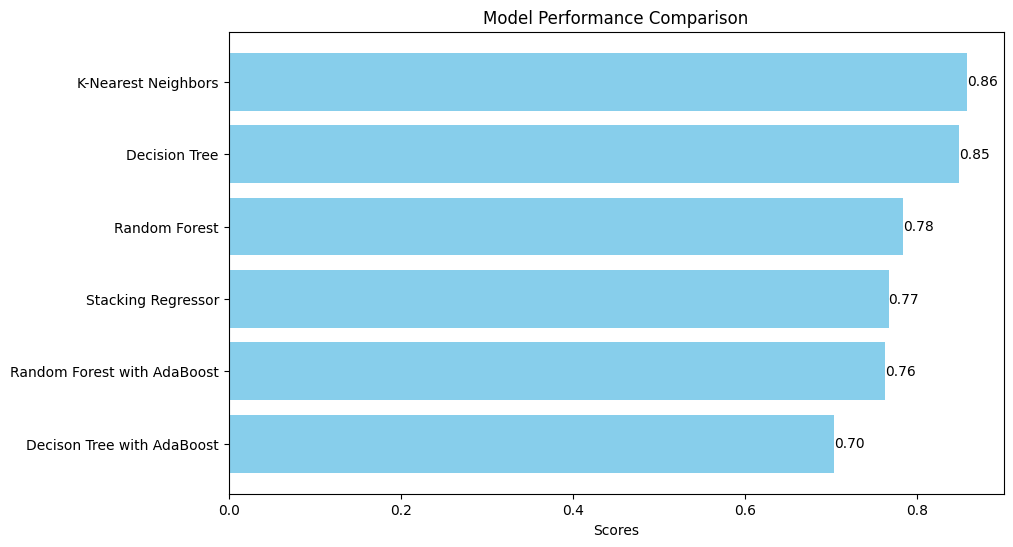

In [203]:
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Extract model names and scores
models = [x[0] for x in sorted_scores]
scores = [x[1] for x in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color='skyblue')
plt.xlabel('Scores')
plt.title('Model Performance Comparison')
plt.gca().invert_yaxis()  # Invert y-axis to display the model with the highest score at the top

# Add total score labels to the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

In [204]:
# Define the classification reports for each model
reports = {
    'AdaBoost Decision Tree': report_ada_dt,
    'AdaBoost Random Forest': report_ada_rf,
    'Decision Tree': report_DT,
    'Random Forest': report_rf,
    'K-Nearest Neighbors': report_KNN,
    'Stack Regression': report_stack_regressor
}

# Print the comparison report
for model, report in reports.items():
    print(f"Classification Report for {model}:")
    print(report)


Classification Report for AdaBoost Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1979
           1       0.84      0.85      0.85      1908

    accuracy                           0.85      3887
   macro avg       0.85      0.85      0.85      3887
weighted avg       0.85      0.85      0.85      3887

Classification Report for AdaBoost Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1979
           1       0.93      0.94      0.94      1908

    accuracy                           0.94      3887
   macro avg       0.94      0.94      0.94      3887
weighted avg       0.94      0.94      0.94      3887

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1979
           1       0.84      0.85      0.85      1908

    accuracy                           0.

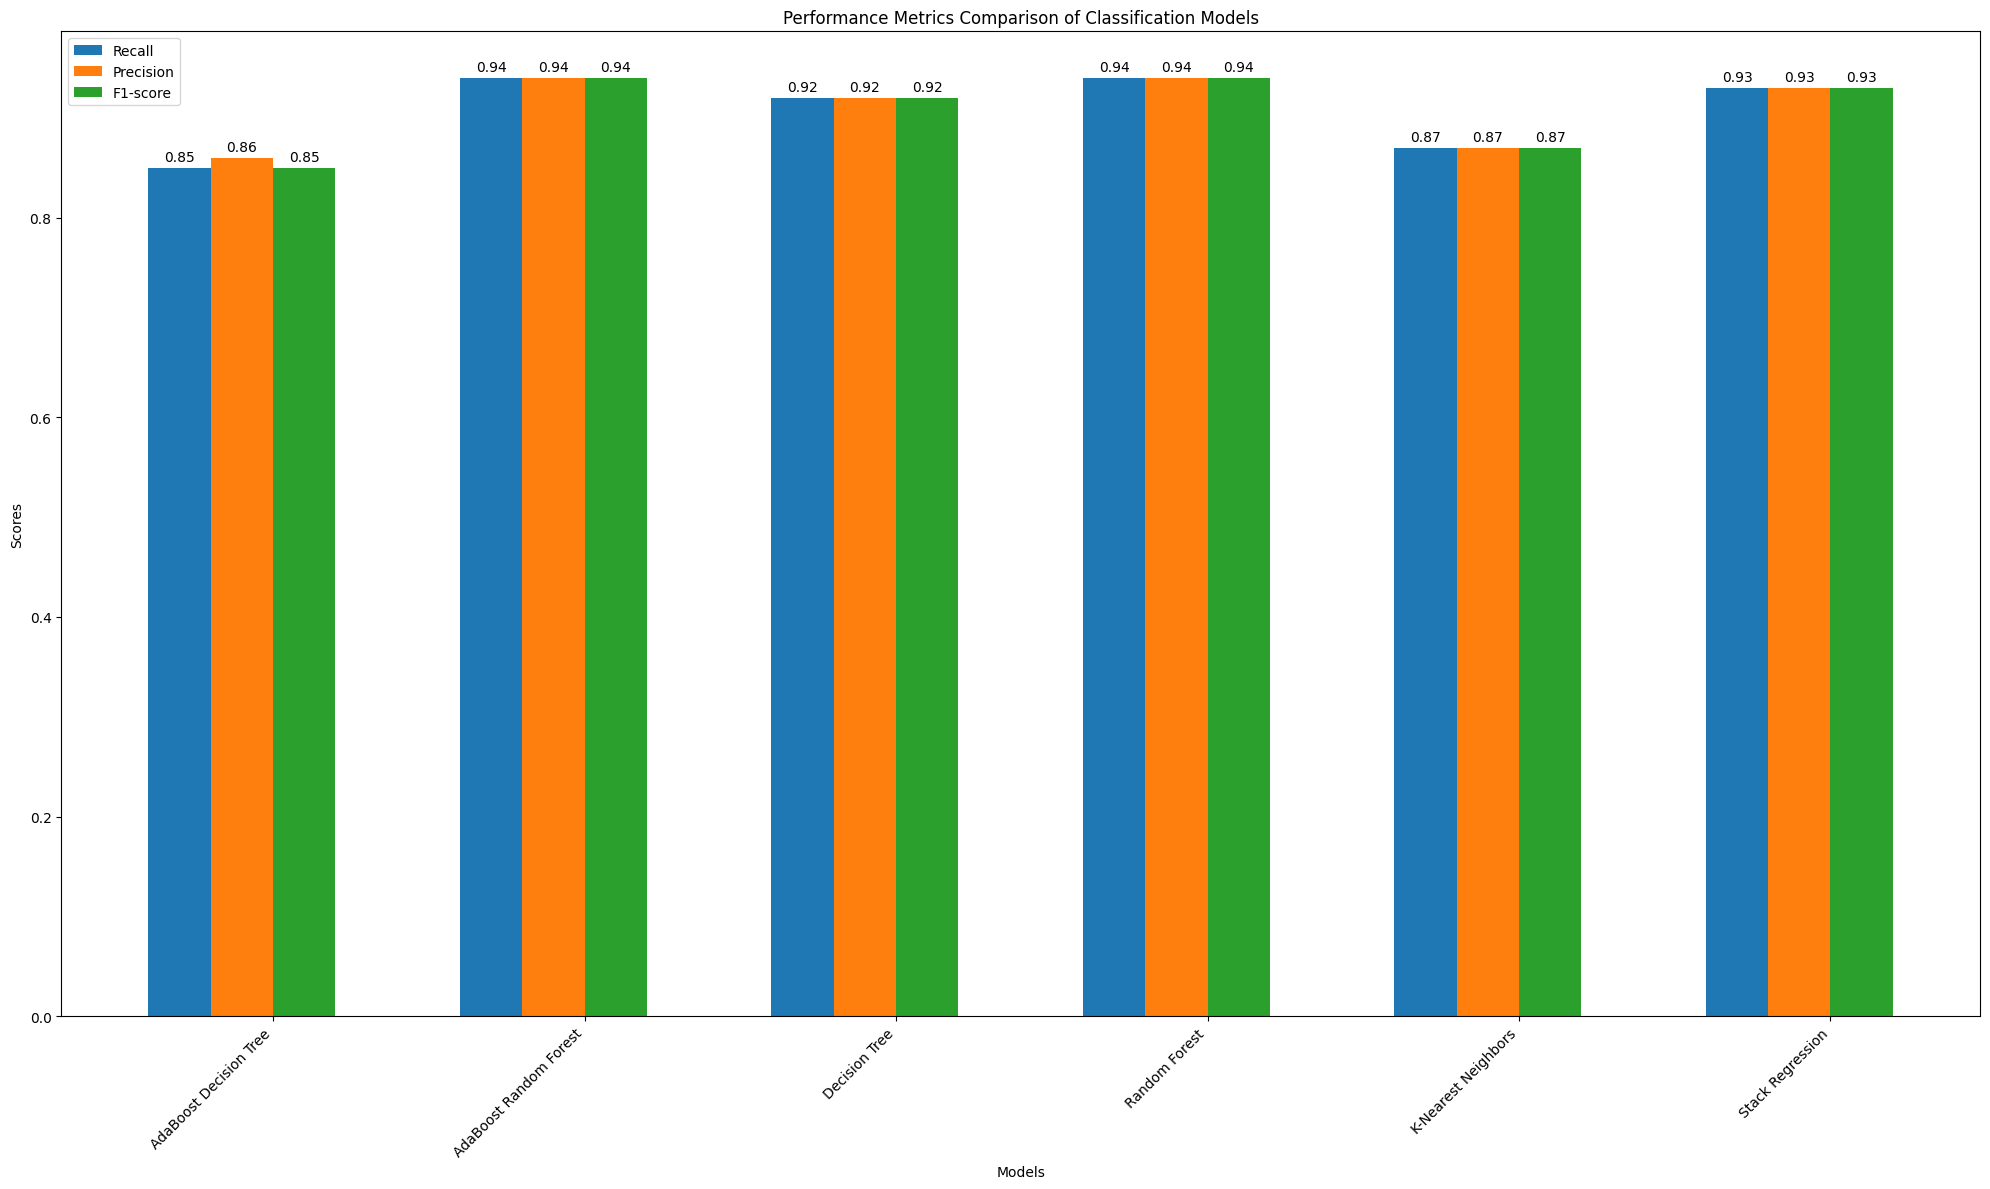

In [205]:
# Hardcoded data
models = ['AdaBoost Decision Tree', 'AdaBoost Random Forest', 'Decision Tree', 'Random Forest', 
          'K-Nearest Neighbors', 'Stack Regression']
recalls = [0.85, 0.94, 0.92, 0.94, 0.87, 0.93]
precisions = [0.86, 0.94, 0.92, 0.94, 0.87, 0.93]
f1_scores = [0.85, 0.94, 0.92, 0.94, 0.87, 0.93]

# Plotting
num_models = len(models)
num_metrics = 3
bar_width = 0.2
index = np.arange(num_models)

fig, ax = plt.subplots(figsize=(20,12))

for i, (metric, values) in enumerate(zip(['Recall', 'Precision', 'F1-score'], [recalls, precisions, f1_scores])):
    bars = ax.bar(index + i * bar_width, values, bar_width, label=metric)
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison of Classification Models')
ax.set_xticks(index + (num_metrics / 2) * bar_width)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


# Conclusion

Based on the model accuracy and performance score, decision tree would be the most optimal model. It has a relatively high scores on each evaluation. Also, it is hard to detect whether the site is a phishing or not solely based on the URL content. 